# Newsguard description

In [1]:
import os
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use("apa.mplstyle") #custom matplotlib style

In [2]:
folder_path = "/data/NewsGuard/full-metadata/"
figures_path = "/home/jluehring/newsguard/newsguard-review-paper/figures/"

## Reading CSV files

In [3]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [4]:
df_total = pd.DataFrame()
for csv in csv_files: #taking all files in the folder
    df = pd.read_csv(os.path.join(folder_path, csv))
    df.name=csv
    #print(df.shape)
    # taking name of file, removing the extension and "metadata-"
    df["file_date"]=csv.split(".")[0].split("-")[1]
    # making file_date a datetime, with the format YYYYMMDD00
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    df_total = pd.concat([df_total, df], axis=0)

In [5]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('1501.csv')] #taking only mid-month 
df15 = pd.DataFrame()
for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv))
    df.name=csv
    #print(df.shape)
    df["file_date"]=csv.split(".")[0].split("-")[1]
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    df15 = pd.concat([df15, df], axis=0)

In [6]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('0201.csv')] #taking only beginning of month
df02 = pd.DataFrame()
for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv))
    df.name=csv
    #print(df.shape)
    df["file_date"]=csv.split(".")[0].split("-")[1]
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    df02 = pd.concat([df02, df], axis=0)

## Domains

In [7]:
#converting date to only the month
df15["file_month"] = pd.to_datetime(df15.file_date).dt.to_period("M")
counts = df15.groupby(df15.file_month).Domain.nunique()
counts.head(3)

file_month
2019-03    2641
2019-04    2700
2019-05    2938
Freq: M, Name: Domain, dtype: int64

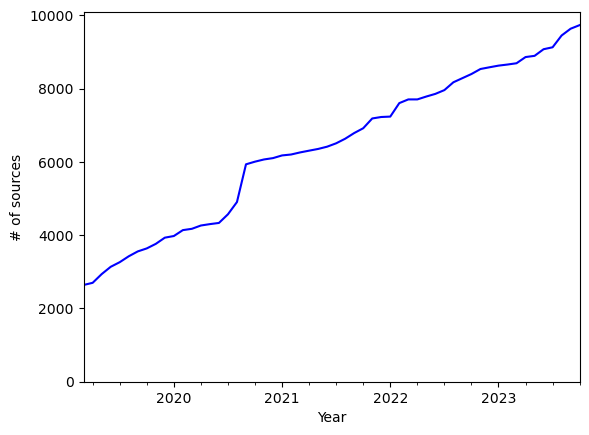

In [8]:
counts.plot(color="blue")
plt.ylim(0)
plt.xlabel("Year")
plt.ylabel("# of sources")
plt.savefig("sources_over_time_midmonth.png", dpi=300)
#plt.show()

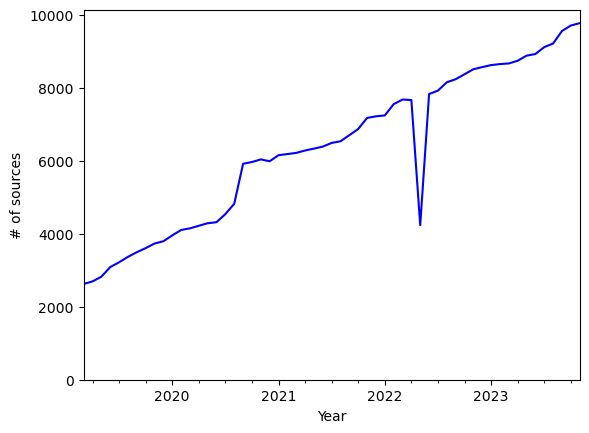

In [9]:
#converting date format to only the month
df02["file_month"] = pd.to_datetime(df02.file_date).dt.to_period("M")
counts = df02.groupby(df02.file_month).Domain.nunique()
counts.plot(color="blue")
plt.ylim(0)
plt.xlabel("Year")
plt.ylabel("# of sources")
plt.savefig("sources_over_time_firstmonth.png", dpi=300)
#plt.show()

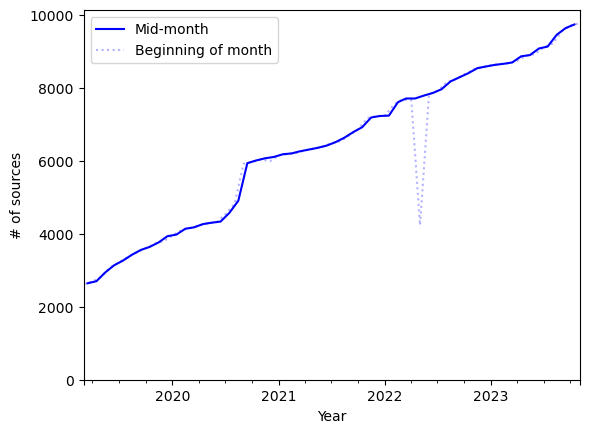

In [10]:
#converting date format to only the month
df15["file_day"] = pd.to_datetime(df15.file_date).dt.to_period("D")
df02["file_day"] = pd.to_datetime(df02.file_date).dt.to_period("D")

#counting unique domains for each condition
counts_15 = df15.groupby(df15.file_day).Domain.nunique()
counts_02 = df02.groupby(df02.file_day).Domain.nunique()

#plotting
counts_15.plot(color="blue", label="Mid-month")
counts_02.plot(color="blue", label="Beginning of month", alpha=0.3, linestyle="dotted")
plt.ylim(0)
plt.xlabel("Year")
plt.ylabel("# of sources")
#plt.xticks(rotation=20)
plt.legend()
plt.savefig(os.path.join(figures_path,"f1-sources_over_time.png"), dpi=300)
plt.show()

In [11]:
date = pd.to_datetime("2023-10").to_period("M")
most_recent = df15[df15["file_month"] == date]
len(most_recent)

11093

In [12]:
date = pd.to_datetime("2019-03").to_period("M")
first = df15[df15["file_month"] == date]
len(first)

2647

In [13]:
most_recent.Rating.value_counts(normalize=True)

T     0.595781
N     0.351934
FL    0.040927
P     0.005679
S     0.005679
Name: Rating, dtype: float64

In [14]:
most_recent.Rating.value_counts(normalize=False)

T     6609
N     3904
FL     454
P       63
S       63
Name: Rating, dtype: int64

In [15]:
most_recent[most_recent.Rating == "P"].Domain.unique()

array(['odysee.com', 'bitchute.com', 'vimeo.com', 'worldstarhiphop.com',
       'worldstar.com', 'worldstaruncut.com', 'prnewswire.com',
       'wikipedia.org', 'lucianne.com', 'openvaers.com', 'youtube.com',
       'youtu.be', '8ch.net', '8kun.top', '4chan.org', 'reddit.com',
       'ots.at', 'medrxiv.org', 'medium.com', 'agoravox.fr',
       'medalerts.org', 'biorxiv.org', 'mavenroundtable.io', 'zenodo.org',
       'patriots.win', 'pscp.tv', 'periscope.tv', 'liker.com',
       'eurekalert.org', 'edublogs.org', 'newsmaven.io',
       'thepetitionsite.com', 'warriormaven.com', 'defensemaven.io',
       'wt.social', 'wikitribune.com', 'tumblr.com', 'rumble.com',
       'kiwifarms.net', 'pubmed.ncbi.nlm.nih.gov', 'ncbi.nlm.nih.gov',
       'dailymotion.com', 'audacy.com', '1010wins.radio.com',
       'connectingvets.radio.com', 'radio.com', 'america.win',
       'thedonald.win'], dtype=object)

In [16]:
most_recent[most_recent.Rating == "FL"].Domain.unique()

array(['govietnamtravel.asia', 'odishadiscoms.com',
       'celebritiesmoney.com', 'howtoplantus.blogspot.com',
       'fashionableform.com', 'editorializenews.com', 'law-magazine.com',
       'networthculture.com', 'escuelahairstudio.com.ar',
       'top10companiesinus.blogspot.com/', 'businesshab.com', 'biiuk.com',
       'hookeaudio.com', 'sunaulorojgar.com', 'decimaltoinches.com',
       'genealogie-wassenaar.nl', 'bharatstories.com', 'roshni.com.pk',
       'cantechletter.com', 'binzaheercracks.com', 'moneyhaat.com',
       'newsceleb.astandloran.com', 'feedbegin.com',
       'newstodaycalifornia.com', 'dotcommagazine.com',
       'fantasykhiladi.com', 'webnews21.com', 'onnedge.com',
       'todayonit.com', 'bollyinside.com', 'pxcrt.com',
       'tarotcardsreaders.com', 'cankutahya.com.tr', 'luggagewiki.com',
       'locobelly.com', 'prsync.com', 'techfull.org',
       'arquitecturanoticias.com', 'recipe.hondausrelease.com',
       'fleeredstates.blog', 'coforbes.com', 'bolsadetra

In [17]:
#print mean of score per rating category
most_recent.groupby("Rating").Score.mean()

Rating
FL          NaN
N     26.012167
P           NaN
S           NaN
T     87.422227
Name: Score, dtype: float64

In [18]:
p_rating = most_recent[most_recent["Rating"] == "P"]
if not p_rating["Score"].isnull().all():
    mean_score = p_rating["Score"].mean(skipna=True)
    print(f"Mean score for rating P: {mean_score}")
else:
    print(f"No scores available for rating P.")

No scores available for rating P.


The categories S, P, and FL refer to Platforms, as well as Satire and Lifestyle outlets, respectively. They also don't have a trustworthiness score. How many domains are rated in the first and the most recent dataframe?

In [19]:
print(f'In the most recent df, there are {len(most_recent[most_recent["Score"].notnull()])} rated domains while there are {len(first[first["Score"].notnull()])} in the first version of the database.')

#subset the data to only include the domains that have a score
#rated_domains = most_recent[most_recent["Score"].notnull()]

In the most recent df, there are 10513 rated domains while there are 2615 in the first version of the database.


## Trustworthiness

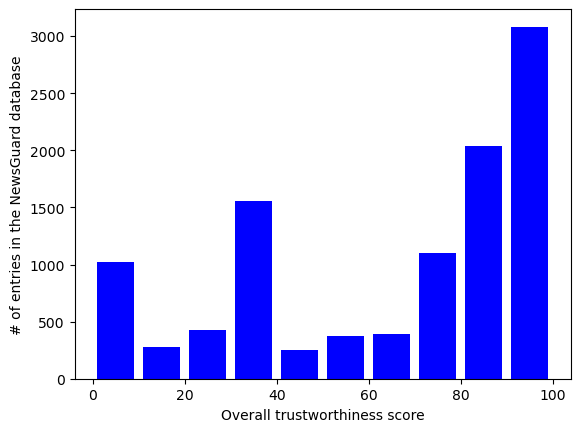

In [20]:
most_recent["Score"].hist(bins=10, color="blue", rwidth=0.8, grid=False)
plt.xlabel("Overall trustworthiness score")
plt.ylabel("# of entries in the NewsGuard database")
plt.savefig(os.path.join(figures_path,"f2-trustworthiness_distribution.png"), dpi=300)
plt.show()

In [21]:
df15["file_year"] = pd.to_datetime(df15.file_date).dt.to_period("Y")
df15.groupby("file_year").Score.value_counts()

file_year  Score
2019       100.0    9525
           87.5     3987
           95.0     2674
           82.5     2606
           5.0      2605
                    ... 
2023       72.0       30
           45.0       20
           67.0       17
           52.5       10
           27.0        8
Name: Score, Length: 303, dtype: int64

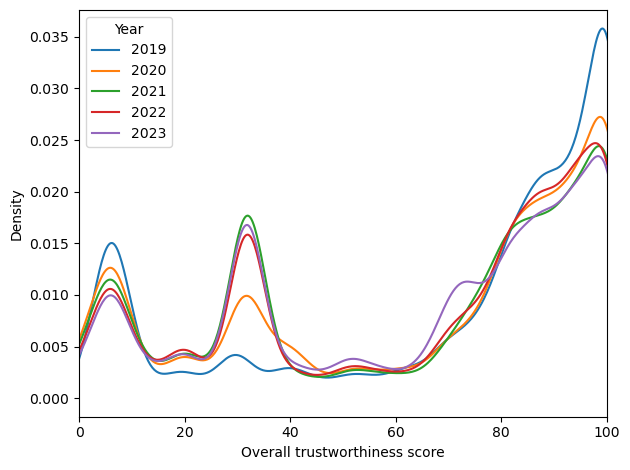

In [22]:
# trustworthiness over time
for date in df15.file_year.unique():
    df15[df15.file_year ==date].Score.plot.kde(
        xlim=(0,100), label=date.strftime("%Y"), bw_method=0.1)
plt.xlabel("Overall trustworthiness score")
plt.ylabel("Density")
plt.legend(title="Year")
plt.tight_layout()
plt.savefig("score_distribution_per_year.png", dpi=300)
plt.show()

In [23]:
df15["year"] = df15["file_year"].astype(str)
year_scores = df15.groupby("year")["Score"].agg(['mean', 'std', 'min', 'max']).reset_index()
print(year_scores)

   year       mean        std  min    max
0  2019  71.767972  33.287474  0.0  100.0
1  2020  66.001125  34.087030  0.0  100.0
2  2021  63.692641  33.858325  0.0  100.0
3  2022  65.200969  33.158941  0.0  100.0
4  2023  64.541012  32.437099  0.0  100.0


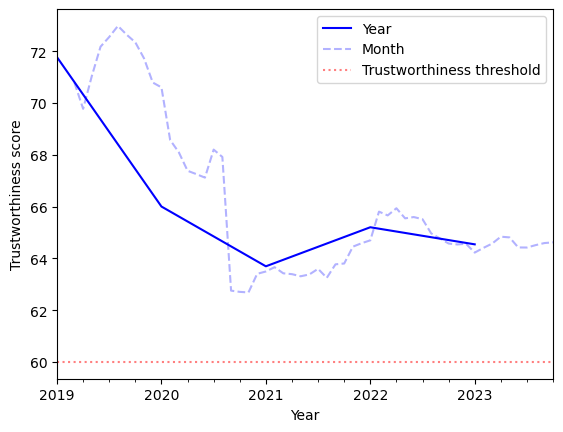

In [24]:
df15.groupby(df15.file_year).Score.mean().plot(color="blue", label="Year")
df15.groupby(df15.file_month).Score.mean().plot(color="blue", label="Month",
                alpha=0.3, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Trustworthiness score")
plt.axhline(y=60, color= "red", linestyle="dotted", 
            alpha=0.5, label="Trustworthiness threshold")
plt.legend()
plt.savefig(os.path.join(figures_path,"f3-scores_over_time.png"), dpi=300)
plt.show()

## Added and removed sources

Monthly changes:

In [25]:
changes_month = {}
unique_months = df15.sort_values("file_month")["file_month"].unique()

for i in range(1, len(unique_months)):
    current_month = unique_months[i]
    previous_month = unique_months[i - 1]
    
    added_month = set(df15[df15["file_month"] == current_month]["Domain"].tolist()) - set(df15[df15["file_month"] == previous_month]["Domain"].tolist())
    removed_month = set(df15[df15["file_month"] == previous_month]["Domain"].tolist()) - set(df15[df15["file_month"] == current_month]["Domain"].tolist())
    changes_month[current_month] = added_month, removed_month

for month, changes in list(changes_month.items())[:10]:
    added_count_month = len(changes[0])
    removed_count_month = len(changes[1])
    print(f'{month} Sources added: {added_count_month}, Sources removed: {removed_count_month}')

2019-04 Sources added: 60, Sources removed: 1
2019-05 Sources added: 238, Sources removed: 0
2019-06 Sources added: 200, Sources removed: 1
2019-07 Sources added: 126, Sources removed: 0
2019-08 Sources added: 162, Sources removed: 1
2019-09 Sources added: 133, Sources removed: 0
2019-10 Sources added: 82, Sources removed: 0
2019-11 Sources added: 135, Sources removed: 11
2019-12 Sources added: 169, Sources removed: 0
2020-01 Sources added: 45, Sources removed: 0


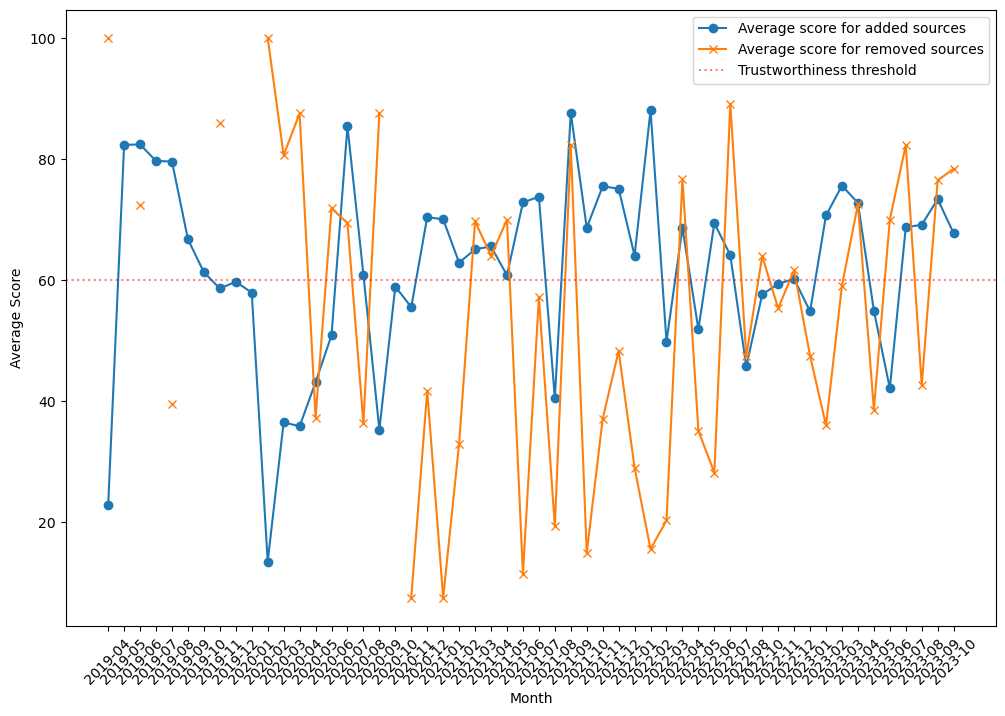

In [26]:
added_scores = []
removed_scores = []
months = []

for date in changes_month.keys():
    added_sources = df15[df15.Domain.isin(changes_month[date][0])]
    removed_sources = df15[df15.Domain.isin(changes_month[date][1])]
    
    added_mean = added_sources["Score"].mean()
    removed_mean = removed_sources["Score"].mean()
    
    added_scores.append(added_mean)
    removed_scores.append(removed_mean)
    months.append(date.strftime('%Y-%m'))

plt.figure(figsize=(12, 8))
plt.plot(months, added_scores, marker='o', label='Average score for added sources')
plt.plot(months, removed_scores, marker='x', label='Average score for removed sources')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.axhline(y=60, color= "red", linestyle="dotted", 
            alpha=0.5, label="Trustworthiness threshold")
plt.xticks(rotation=45)
plt.legend()
#plt.tight_layout()
plt.show()

In [27]:
domain_list_added = []
domain_list_removed = []
for date in changes_month.keys():
    domain_list_added.extend(changes_month[date][0])
    domain_list_removed.extend(changes_month[date][1])

print(f"Total number of added sources: {len(domain_list_added)}")
print(f"Total number of removed sources: {len(domain_list_removed)}")

Total number of added sources: 7705
Total number of removed sources: 612


In [28]:
added_mean = df15[df15.Domain.isin(domain_list_added)]["Score"].mean()
removed_mean = df15[df15.Domain.isin(domain_list_removed)]["Score"].mean()
added_std = df15[df15.Domain.isin(domain_list_added)]["Score"].std()
removed_std = df15[df15.Domain.isin(domain_list_removed)]["Score"].std()
print(f"Overall mean for added sources: {added_mean}, SD: {added_std}.")
print(f"Overall mean for removed sources: {removed_mean}, SD: {removed_std}.")

Overall mean for added sources: 62.08914091239942, SD: 32.14377351763479.
Overall mean for removed sources: 53.49675250248338, SD: 31.59847336786034.


Yearly changes:

In [29]:
changes_year = {}
unique_years = df15.sort_values("file_year")["file_year"].unique()

for i in range(1, len(unique_years)):
    current_year = unique_years[i]
    previous_year = unique_years[i - 1]
    
    added_year = set(df15[df15["file_year"] == current_year]["Domain"].tolist()) - set(df15[df15["file_year"] == previous_year]["Domain"].tolist())
    removed_year = set(df15[df15["file_year"] == previous_year]["Domain"].tolist()) - set(df15[df15["file_year"] == current_year]["Domain"].tolist())
    
    changes_year[current_year] = added_year, removed_year
    
for year, changes in changes_year.items():
    added_count_year = len(changes[0])
    removed_count_year = len(changes[1])
    print(f'{year} Sources added: {added_count_year}, Sources removed: {removed_count_year}')

2020 Sources added: 2319, Sources removed: 14
2021 Sources added: 1263, Sources removed: 146
2022 Sources added: 1522, Sources removed: 155
2023 Sources added: 1249, Sources removed: 169


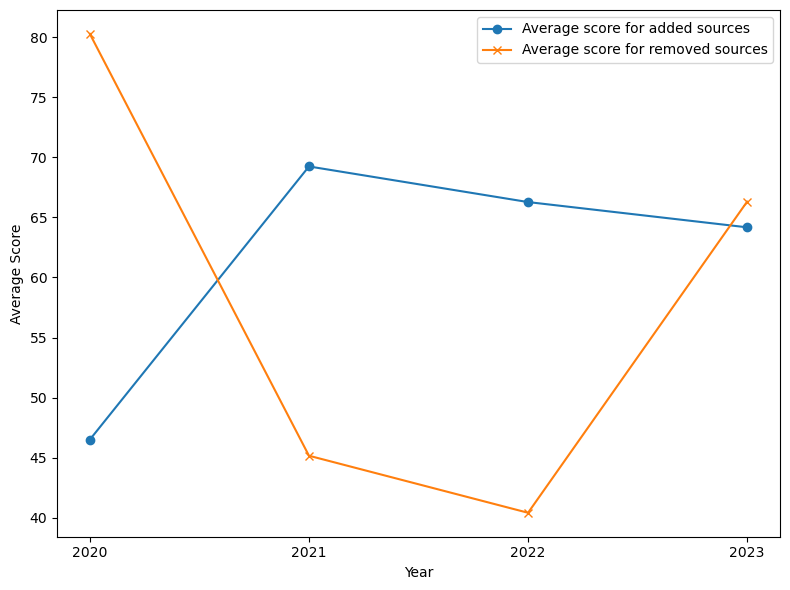

In [30]:
added_scores_yrs = []
removed_scores_yrs = []
years = []

for date in changes_year.keys():
    added_sources_yrs = df15[df15.Domain.isin(changes_year[date][0])]
    removed_sources_yrs = df15[df15.Domain.isin(changes_year[date][1])]
    
    added_mean_yrs = added_sources_yrs["Score"].mean()
    removed_mean_yrs = removed_sources_yrs["Score"].mean()
    
    added_scores_yrs.append(added_mean_yrs)
    removed_scores_yrs.append(removed_mean_yrs)
    years.append(date.strftime('%Y'))

plt.figure(figsize=(8, 6))
plt.plot(years, added_scores_yrs, marker='o', label='Average score for added sources')
plt.plot(years, removed_scores_yrs, marker='x', label='Average score for removed sources')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks()
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
added_scores_yrs

[46.50270988022329, 69.247022446175, 66.28097615285161, 64.17735995347935]

In [32]:
removed_scores_yrs

[80.28195488721805, 45.156545961002784, 40.40552200172563, 66.32107413893753]

In [33]:
df15["Last Updated"]=pd.to_datetime(df15["Last Updated"],unit="ms")
df15["Last Updated"].head(3)

0   2018-07-20 14:03:17.020
1   2018-07-20 14:03:21.115
2   2018-07-20 14:03:25.883
Name: Last Updated, dtype: datetime64[ns]

In [34]:
domain_updates_sorted = df15.groupby("Domain").apply(
                        lambda x: x.sort_values("Last Updated")
                        ).reset_index(drop=True)
domain_updates_sorted.head(3)

UUID         Domain        Parent Domain  \
0  b9704871-32df-4721-881c-2dc6d03d8905  1000logos.net                  NaN   
1  07be0795-9c5e-43ad-932b-e7e0154d5828   100fedup.com  100percentfedup.com   
2  07be0795-9c5e-43ad-932b-e7e0154d5828   100fedup.com  100percentfedup.com   

  Rating  Score            Last Updated Country Language  \
0     FL    NaN 2023-09-27 04:25:20.721      US       en   
1      N    7.5 2018-09-08 22:26:33.205      US       en   
2      N    7.5 2018-09-08 22:26:33.205      US       en   

  Does not repeatedly publish false content  \
0                                       NaN   
1                                        No   
2                                        No   

  Gathers and presents information responsibly  ... ANDROIDAPP OTHER  \
0                                          NaN  ...        NaN   NaN   
1                                           No  ...        NaN   NaN   
2                                           No  ...        NaN   NaN   

  Contact Mail Form URL.1 Communities Served BrandGuard Segments  \
0                     NaN                NaN                 NaN   
1                     NaN                NaN                 NaN   
2                     NaN                NaN                 NaN   

  False Narratives file_month    file_day file_year  year  
0              NaN    2023-10  2023-10-15      2023  2023  
1              NaN    2019-03  2019-03-15      2019  2019  
2              NaN    2019-04  2019-04-15      2019  2019  

[3 rows x 67 columns]

In [35]:
domain_updates_diff = domain_updates_sorted.groupby("Domain")["Last Updated"].diff()

In [36]:
mean_diff_per_domain = domain_updates_diff.groupby(domain_updates_sorted['Domain']).mean()
print(mean_diff_per_domain)

Domain
1000logos.net                                 NaT
100fedup.com              33 days 21:15:57.465500
100giornidaleoni.it    11 days 19:19:24.704161290
100milefreepress.net   29 days 03:54:08.764789473
100percentfedup.com    33 days 21:15:57.465666666
                                  ...            
zonazealots.com        19 days 02:24:51.745136363
zt.20minut.ua                     0 days 00:00:00
zuerst.de              14 days 05:00:50.566652174
zurzeit.at                 0 days 00:00:00.296000
zvw.de                    11 days 15:22:45.177160
Name: Last Updated, Length: 10298, dtype: timedelta64[ns]


In [37]:
print(f'The average time difference between updates is: {mean_diff_per_domain.mean()} days, SD={mean_diff_per_domain.std()}.')
print(f'The range of time differences between updates is: max={mean_diff_per_domain.max()}, min={mean_diff_per_domain.min()} days.')

The average time difference between updates is: 20 days 07:25:47.829517579 days, SD=11 days 06:07:09.482016376.
The range of time differences between updates is: max=192 days 11:28:40.889500, min=0 days 00:00:00 days.


In [38]:
domain_updates_sorted["Score_diff"] = domain_updates_sorted.groupby("Domain")["Score"].diff()
domain_score_diff = domain_updates_sorted.groupby("Domain")["Score_diff"].mean()
print(f'The average score difference between updates is: {domain_score_diff.mean()}, SD={domain_score_diff.std()}.')
print(f'The range of score differences is: max={domain_score_diff.max()}, min={domain_score_diff.min()}')

The average score difference between updates is: -0.01267464816623147, SD=0.2487325143977878.
The range of score differences is: max=2.6041666666666665, min=-4.375


In [39]:
domain_updates_sorted["Score_diff"].value_counts().sort_values(ascending=False).head(5)

 0.0     377098
-7.5       1099
 7.5        849
 12.5       847
 5.0        722
Name: Score_diff, dtype: int64

<Axes: >

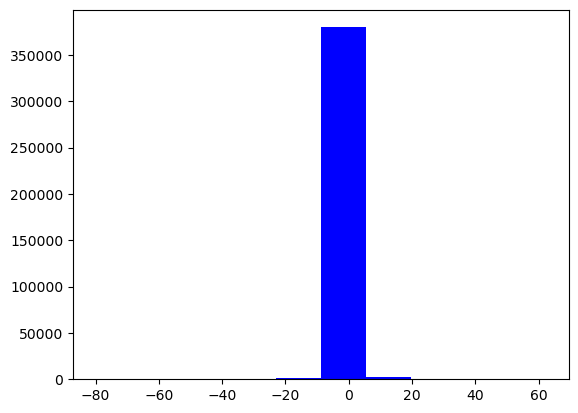

In [40]:
domain_updates_sorted["Score_diff"].hist(color="blue",grid=False)

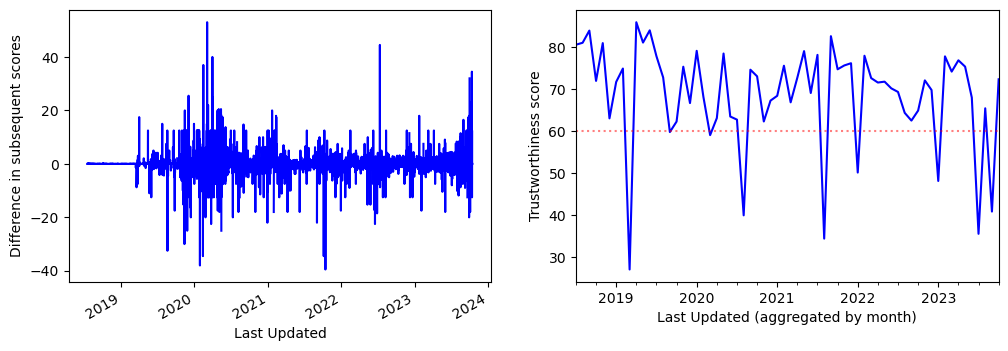

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

domain_updates_sorted.groupby(domain_updates_sorted["Last Updated"]).Score_diff.mean().plot(color="blue", ax=ax1)
ax1.set_xlabel('Last Updated')
ax1.set_ylabel('Difference in subsequent scores')

df15["last_updated_month"] = pd.to_datetime(df15["Last Updated"]).dt.to_period("M")
df15.groupby(df15.last_updated_month).Score.mean().plot(color="blue", label="Score", ax=ax2)
ax2.set_xlabel("Last Updated (aggregated by month)")
ax2.set_ylabel("Trustworthiness score")
ax2.axhline(y=60, color="red", linestyle="dotted", alpha=0.5, label="Trustworthiness threshold")
#ax2.legend()

plt.savefig(os.path.join(figures_path, "f4-score_updates.png"), dpi=300)
plt.show()

In [50]:
#sort by score diff and print domain name and score diff
domain_updates_sorted.sort_values("Score_diff", ascending=True)[["Domain", "Score_diff", "Last Updated"]].head(10)

Domain  Score_diff            Last Updated
62498   conservativedailynews.com       -80.0 2020-11-23 16:39:32.187
334126          thefederalist.com       -62.5 2019-10-10 17:21:38.137
340426       theragingpatriot.com       -53.0 2021-10-15 12:19:44.207
339359            theohiostar.com       -52.5 2021-01-05 17:53:34.221
264264              pluralist.com       -50.5 2020-12-31 13:12:44.411
208099          mindbodygreen.com       -50.0 2020-05-14 09:34:53.487
62945      conservativereview.com       -48.0 2021-11-23 22:24:23.150
171724                   kusi.com       -48.0 2022-12-29 20:18:24.788
249298         onegreenplanet.org       -47.5 2020-04-23 11:14:18.844
281663        redstatewatcher.com       -47.0 2023-05-18 22:04:09.100

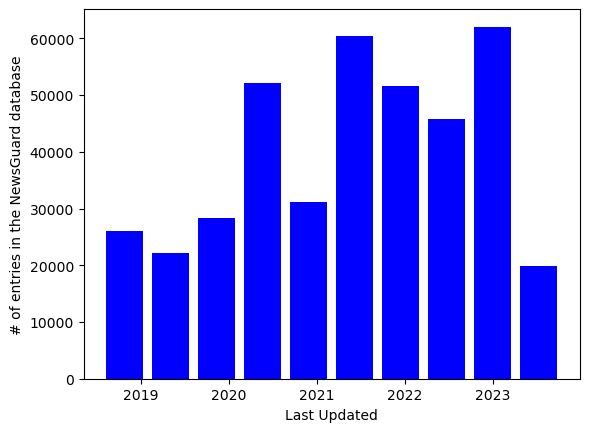

In [62]:
df15["Last Updated"].hist(bins=10, color="blue", rwidth=0.8, grid=False)
plt.xlabel("Last Updated")
plt.ylabel("# of entries in the NewsGuard database")
#plt.savefig("last_updated_distribution.png", dpi=300)
plt.show()

## Criteria

In [41]:
def plot_yesno(col,df=most_recent):
    most_recent[col].value_counts().plot(kind='bar')
    plt.xlabel('Value')
    plt.ylabel('Number of sources')
    plt.title(f'Number of sources respecting the "{col}" criteria')

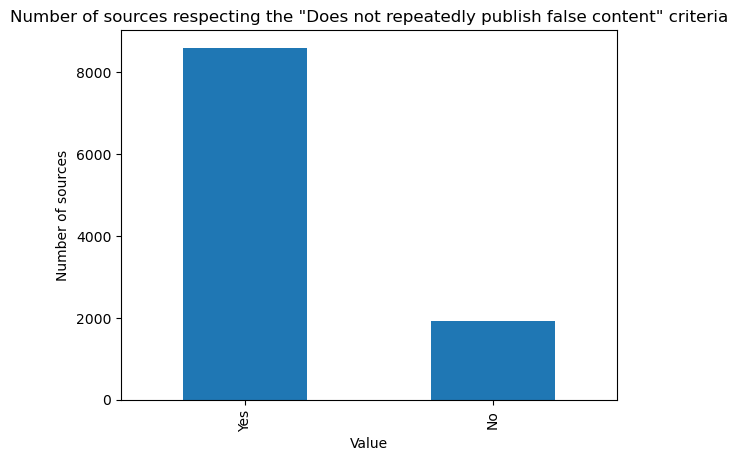

In [42]:
plot_yesno("Does not repeatedly publish false content")

In [43]:
most_recent["Does not repeatedly publish false content"].value_counts()

Yes    8597
No     1916
Name: Does not repeatedly publish false content, dtype: int64

In [48]:
for col in most_recent.columns[8:17]:
    print(f"{col} {most_recent[col].value_counts()[0]}")

Does not repeatedly publish false content 8597
Gathers and presents information responsibly 6472
Regularly corrects or clarifies errors 6478
Handles the difference between news and opinion responsibly 6910
Avoids deceptive headlines 8754
Website discloses ownership and financing 5643
Clearly labels advertising 6212
Reveals who's in charge, including any possible conflicts of interest 6432
The site provides names of content creators, along with either contact or biographical information 5409


In [50]:
#calculate percentages
for col in most_recent.columns[8:17]:
    print(f"{col} {most_recent[col].value_counts()[0]/len(most_recent)*100}")

Does not repeatedly publish false content 77.49932389795366
Gathers and presents information responsibly 58.34309925178041
Regularly corrects or clarifies errors 58.39718741548724
Handles the difference between news and opinion responsibly 62.291535202379876
Avoids deceptive headlines 78.9146308482827
Website discloses ownership and financing 50.86991796628505
Clearly labels advertising 55.99927882448391
Reveals who's in charge, including any possible conflicts of interest 57.98251149373479
The site provides names of content creators, along with either contact or biographical information 48.7604795817182


In [69]:
criteria_columns = most_recent.columns[8:17]

# Reshaping the data using melt to unpivot the 'Yes'/'No' columns
melted_data = pd.melt(most_recent, value_vars=criteria_columns, var_name='Criteria', value_name='Label')

# Counting the occurrences of 'Yes' and 'No' for each criterion
reshaped_data = melted_data.groupby(['Criteria', 'Label']).size().unstack(fill_value=0).reset_index()

In [70]:
reshaped_data

Label                                           Criteria    No   Yes
0                             Avoids deceptive headlines  1746  8754
1                             Clearly labels advertising  3284  6212
2              Does not repeatedly publish false content  1916  8597
3           Gathers and presents information responsibly  4041  6472
4      Handles the difference between news and opinio...  3541  6910
5                 Regularly corrects or clarifies errors  6478  4034
6      Reveals who's in charge, including any possibl...  4078  6432
7      The site provides names of content creators, a...  5409  5068
8              Website discloses ownership and financing  5643  4870

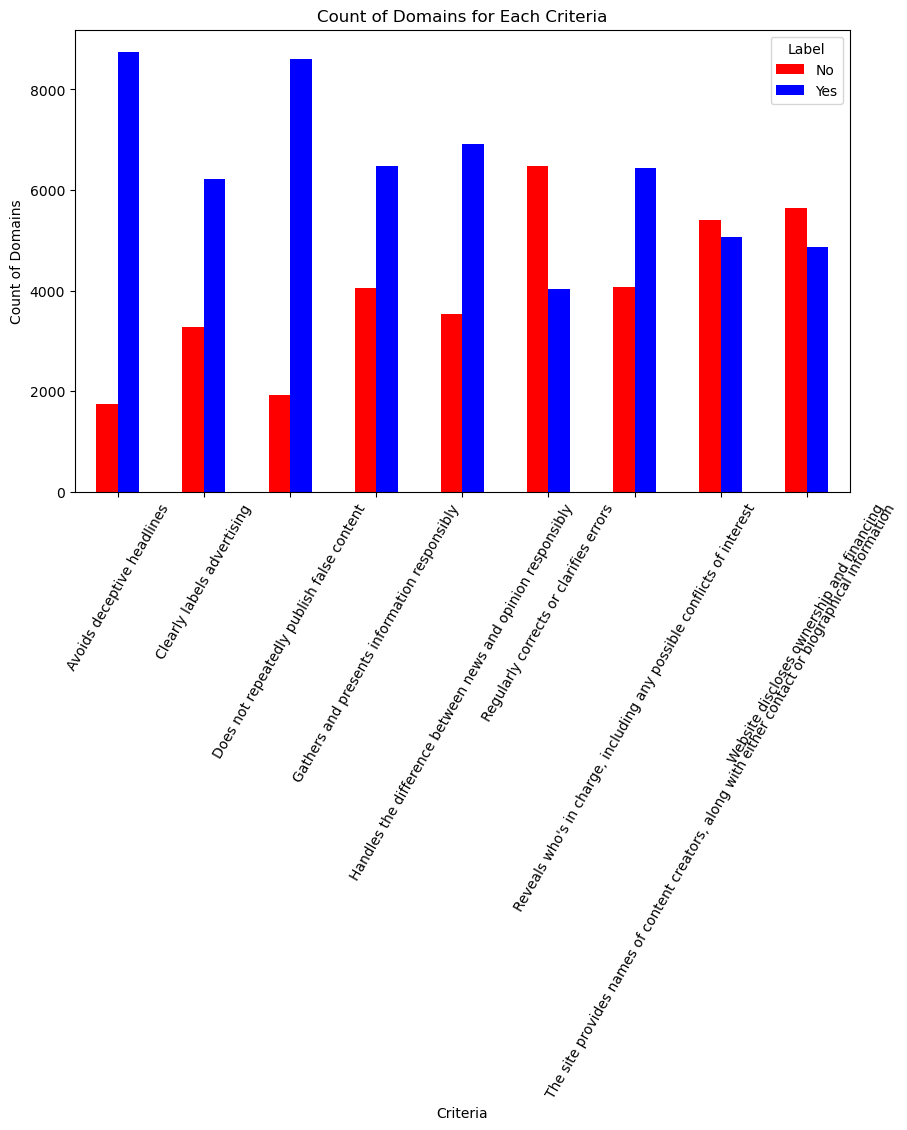

In [80]:
reshaped_data.plot(x='Criteria', kind='bar', stacked=False, color=['red', 'blue'], figsize=(10, 6))
plt.xlabel('Criteria')
plt.ylabel('Count of Domains')
plt.title('Count of Domains for Each Criteria')
plt.xticks(rotation=60)
plt.legend(title='Label', loc='upper right')
plt.show()

## Languages

In [8]:
df_total.groupby("Country").Language.value_counts()

Country  Language
ALL      en          100913
AT       de             918
AU       en            3099
CA       en           16262
         fr            1492
DE       de           27756
FR       fr           34124
GB       en           37341
IT       it           37688
NZ       en             252
US       en          552809
         es              30
Name: Language, dtype: int64

Let us now consider only the German ones as we only really care about them

In [14]:
# select only DE rows
ng_de = ng[ng["Language"]=="de"]

In [16]:
ng_de.Domain.nunique()

363

In [17]:
ng_de["Parent Domain"].nunique()

21

## Distribution of the various attributes

Now that we've seen some temporal variation, let's look at the latest dataset (the most up to date one) to see how some of the attributes are distributed

In [26]:
df_de_last = df_de[df_de.file_date==dates[-1]]

In [27]:
df_de_last.shape

(347, 56)

In [28]:
df_de_last["Parent Domain"].nunique()

15

313 sources in the latest iteration available, 12 parent domains


Let's check when they were last updated

In [29]:
# the last update field is in unix epoch milliseconds time i presume, lets convert it
df_de_last["Last Updated"] = pd.to_datetime(df_de_last["Last Updated"], unit='ms')


C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\1529352692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de_last["Last Updated"] = pd.to_datetime(df_de_last["Last Updated"], unit='ms')


In [30]:
# make date only day and month and year
df_de_last["Last Updated"] = df_de_last["Last Updated"].dt.date

C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\3992991148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de_last["Last Updated"] = df_de_last["Last Updated"].dt.date


In [31]:
df_de_last["Last Updated"].describe()

count            347
unique           106
top       2023-02-20
freq              19
Name: Last Updated, dtype: object

In [32]:
df_de_last["Last Updated"].describe()


count            347
unique           106
top       2023-02-20
freq              19
Name: Last Updated, dtype: object

Now the rest of the columns

In [33]:
# let's see the nas
df_de_last.isna().sum().sort_values()

UUID                                                                                                    0
Targeted Audience                                                                                       0
file_date                                                                                               0
Opinion/Advocacy Journalism                                                                             0
Language                                                                                                0
Country                                                                                                 0
score_cat                                                                                               0
Domain                                                                                                  0
Last Updated                                                                                            0
Rating                                        

Weird thing: some sources don't have a score

In [34]:
df_de_last[df_de_last["Score"].isna()]

UUID              Domain Parent Domain   
2724  a65efe1b-8ed4-4d80-8b40-2ec8c9e8e3aa            youtu.be   youtube.com  \
2725  1241ed36-7b40-4d5e-b2c4-45f6e95d3f31         youtube.com   youtube.com   
3262  0aeb3bcd-24c5-4421-9c22-1a1ea2db5c42   der-postillon.com           NaN   
3621  d285ced6-f838-46e5-aca2-c1aef270375f       wikipedia.org           NaN   
6451  9a05ddc4-0860-4a34-aa14-da2c35e871f3  dietagespresse.com           NaN   

     Rating  Score Last Updated Country Language   
2724      P    NaN   2022-12-27      DE       de  \
2725      P    NaN   2022-12-27      DE       de   
3262      S    NaN   2022-12-06      DE       de   
3621      P    NaN   2022-11-18      DE       de   
6451      S    NaN   2022-08-25      AT       de   

     Does not repeatedly publish false content   
2724                                       NaN  \
2725                                       NaN   
3262                                       NaN   
3621                                       NaN   
6451                                       NaN   

     Gathers and presents information responsibly  ...   
2724                                          NaN  ...  \
2725                                          NaN  ...   
3262                                          NaN  ...   
3621                                          NaN  ...   
6451                                          NaN  ...   

                                                iOS App   
2724  https://apps.apple.com/fr/app/youtube/id544007664  \
2725  https://apps.apple.com/fr/app/youtube/id544007664   
3262  https://apps.apple.com/us/app/the-postillon/id...   
3621  https://apps.apple.com/us/app/wikipedia/id3247...   
6451  https://apps.apple.com/de/app/tagespresse/id10...   

                                            Android App Original Reporting   
2724  https://play.google.com/store/apps/details?id=...                Yes  \
2725  https://play.google.com/store/apps/details?id=...                Yes   
3262  https://play.google.com/store/apps/details?id=...                Yes   
3621  https://play.google.com/store/apps/details?id=...                NaN   
6451  https://play.google.com/store/apps/details?id=...                Yes   

                          Targeted Audience Contact Mail Form URL.1   
2724  International,National,Regional,Local                     NaN  \
2725  International,National,Regional,Local                     NaN   
3262                 International,National                     NaN   
3621  National,International,Regional,Local                     NaN   
6451                 National,International                     NaN   

                                   Other   
2724  https://www.pinterest.com/YouTube/  \
2725  https://www.pinterest.com/YouTube/   
3262                                 NaN   
3621                                 NaN   
6451                                 NaN   

                                       False Narratives Communities Served   
2724  f7aa45ce-6b94-42b9-99a8-a8b347b6dbfa,54d48231-...                NaN  \
2725  f7aa45ce-6b94-42b9-99a8-a8b347b6dbfa,54d48231-...                NaN   
3262                                                NaN                NaN   
3621                                                NaN                NaN   
6451                                                NaN                NaN   

     BrandGuard Segments      score_cat  
2724                 NaN  very negative  
2725                 NaN  very negative  
3262                 NaN  very negative  
3621                 NaN  very negative  
6451                 NaN  very negative  

[5 rows x 56 columns]

Wikipedia and youtube make sense as special cases, the others a bit less

In [35]:
# Score by rating
df_de_last.groupby(df_de_last.Rating).Score.value_counts()

Rating  Score
N       7.5      22
        20.0     17
        12.5      8
        17.5      4
        32.5      4
        52.0      4
        37.5      3
        44.5      3
        25.0      3
        0.0       2
        47.5      2
        35.0      2
        30.0      2
        57.0      2
        59.5      1
        50.0      1
        39.5      1
        27.5      1
        15.0      1
T       100.0    96
        95.0     50
        87.5     33
        92.5     25
        82.5     22
        75.0      9
        80.0      4
        62.5      4
        77.5      3
        82.0      3
        69.5      2
        85.0      2
        70.0      2
        64.5      2
        67.5      1
        90.0      1
Name: count, dtype: int64

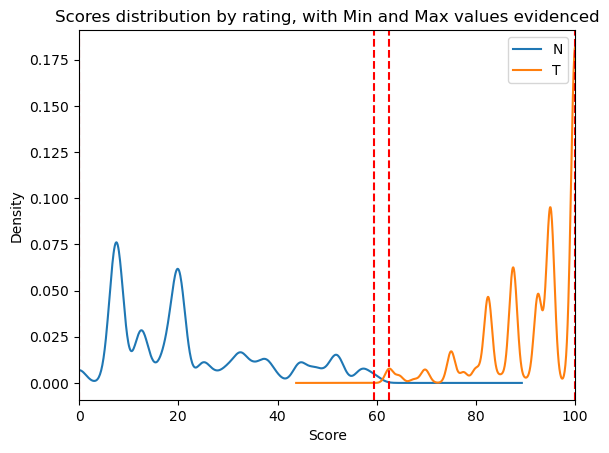

In [36]:
# let's see the distribution of the scores by rating for T and N
df_de_last.loc[df_de_last.Rating.isin(["T","N"]),].groupby(df_de_last.Rating).Score.plot.kde(xlim=(0,100), bw_method=0.09, legend=True)
# make each line stop where they have the min and max value
for rating in df_de_last.loc[df_de_last.Rating.isin(["T","N"]),].Rating.unique():
    plt.axvline(df_de_last.loc[df_de_last.Rating==rating,].Score.min(), color='red', linestyle='--')
    
    plt.axvline(df_de_last.loc[df_de_last.Rating==rating,].Score.max(), color='red', linestyle='--')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Scores distribution by rating, with Min and Max values evidenced')
plt.show()

I imagine that the T type of sources are trustworthy and N is non-trustworthy, this Rating column is not documented but the cutoff appears to be at 60, they mention on their website that sources under 60 have to be "considered with caution"

In [37]:
# an helper function for all of this boolean columns
def plot_yesno(col,df=df_de_last):
    df_de_last[col].value_counts().plot(kind='bar')
    plt.xlabel('Value')
    plt.ylabel('Number of sources')
    plt.title(f'Number of sources respecting the "{col}" criteria')
    

## The criterias

1. "Does not repeatedly publish false content: The site does not repeatedly and currently produce content that has been found to be clearly and significantly false, and which has not been quickly and prominently corrected. There is a “high bar” for failing this criterion. In practice, it means that on any given day the website is likely to display significantly false content. (22 Points.)"

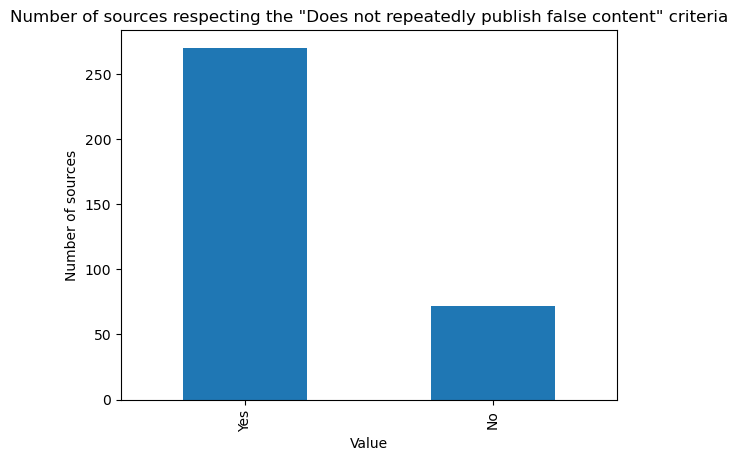

In [38]:
#Does not repeatedly publish false content                                                               4
plot_yesno("Does not repeatedly publish false content")

2. "Gathers and presents information responsibly: Content providers are generally fair and accurate in reporting and presenting information. They reference multiple sources, preferably those that present direct, firsthand information on a subject or event or from credible secondhand news sources, and they do not egregiously distort or misrepresent information to make an argument or report on a subject. (18 Points)"

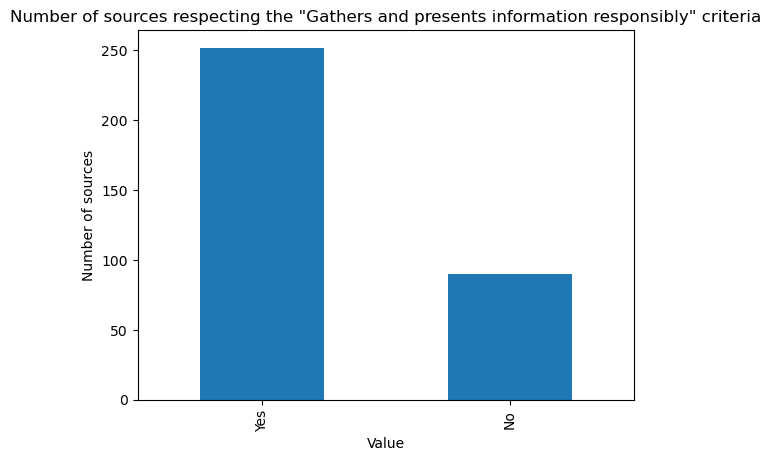

In [39]:
#Gathers and presents information responsibly                                                            4
plot_yesno("Gathers and presents information responsibly")

3. "Regularly corrects or clarifies errors: The site has effective practices for identifying errors and for publishing clarifications and corrections, transparently acknowledges errors, and does not regularly leave significant false content uncorrected. (12.5 Points)"

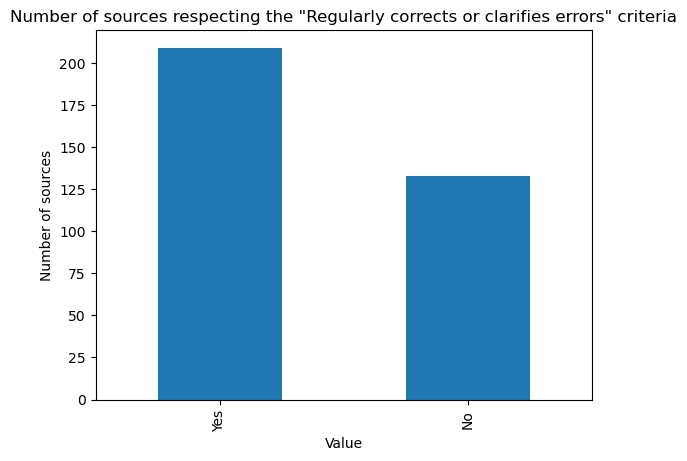

In [40]:
#Regularly corrects or clarifies errors                                                                 4
plot_yesno("Regularly corrects or clarifies errors")

4. Handles the difference between news and opinion responsibly: Content providers who convey the impression that they report news or a mix of news and opinion distinguish opinion from news reporting, and when reporting news, do not egregiously cherry pick facts or stories to advance opinions. Content providers who advance a particular point of view disclose that point of view. (12.5 Points)

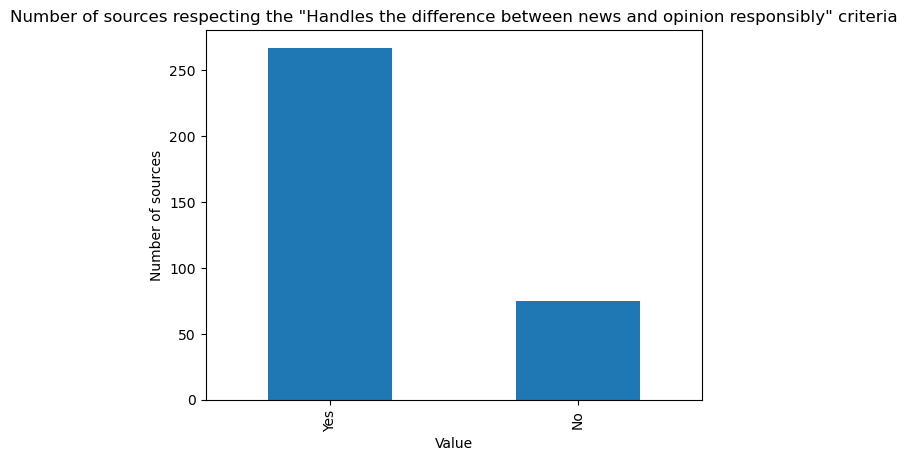

In [41]:
#Handles the difference between news and opinion responsibly                                            4
plot_yesno("Handles the difference between news and opinion responsibly")

5. "Avoids deceptive headlines: The site generally does not publish headlines that include false information, significantly sensationalize, or otherwise do not reflect what is actually in the content under the headline. (10 Points)" 

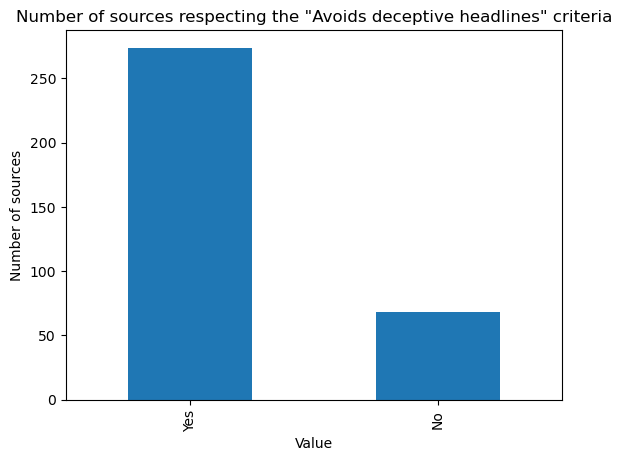

In [42]:
#Avoids deceptive headlines                                                                             4
plot_yesno("Avoids deceptive headlines")

6. "Website discloses ownership and financing: The site discloses in a user-friendly manner its ownership and/or financing, as well as any notable political affiliations or financial interests relevant to the site’s coverage held by those with a significant financial interest in the site. Put simply, the reader should know who is funding the content and what relevant interests the owner or funder might have in the content. (7.5 Points)"

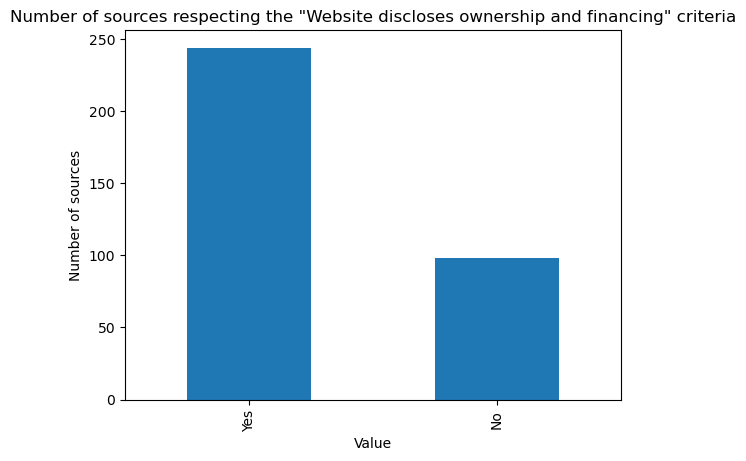

In [43]:
# Website discloses ownership and financing
plot_yesno("Website discloses ownership and financing")

7. "Clearly labels advertising: The site makes clear which content is paid for and which is not. (7.5 Points)"

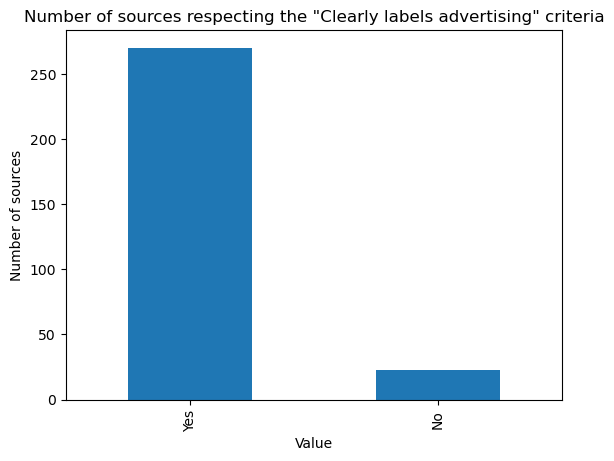

In [44]:
#Clearly labels advertising
plot_yesno("Clearly labels advertising")

8. "Reveals who’s in charge, including possible conflicts of interest: Those in charge of the content are identified on the site, and there is a way for readers to contact the site about editorial issues. In other words, the reader is told who is in charge of deciding what content is published. (5 Points)"

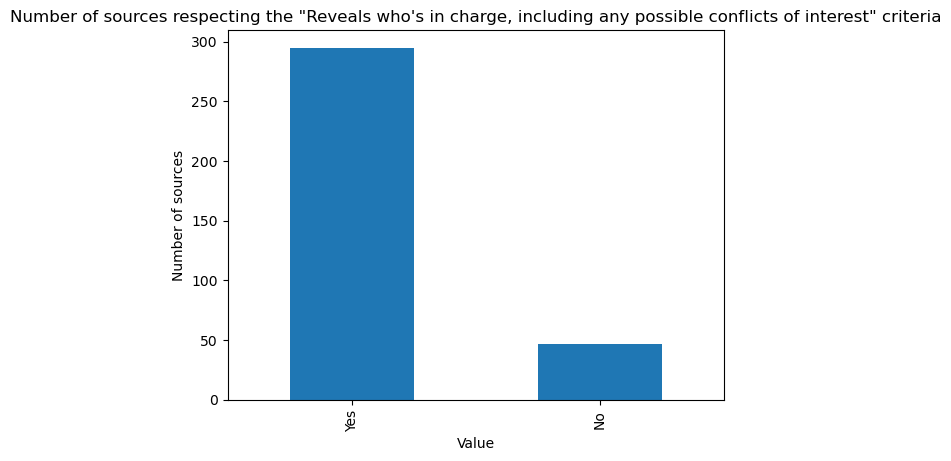

In [45]:
#Reveals who's in charge, including any possible conflicts of interest
plot_yesno("Reveals who's in charge, including any possible conflicts of interest")

9. The site provides the names of content creators, along with either contact or biographical information: Information about those producing the content is made accessible on the site, and it is generally clear who produces which content. (5 Points) 

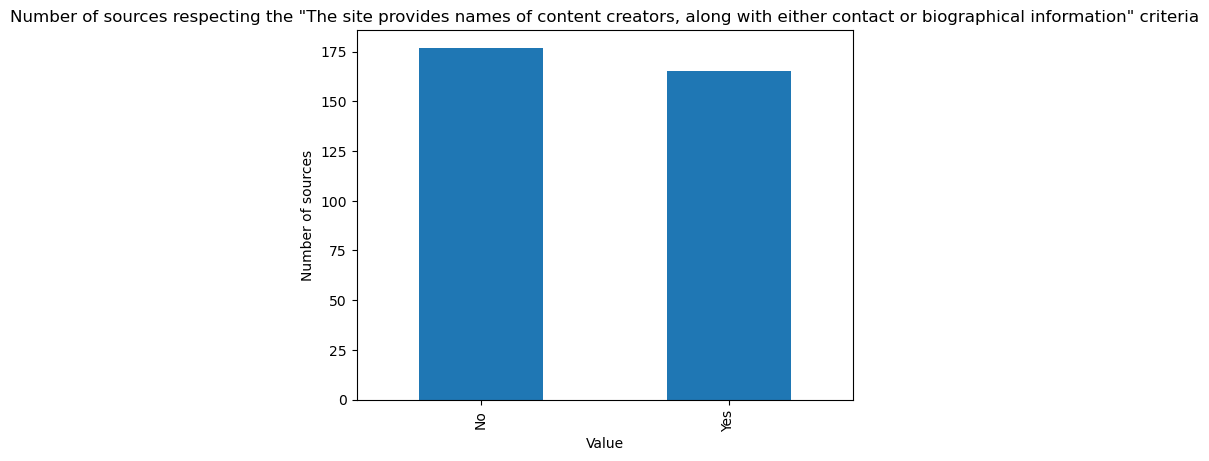

In [46]:
#The site provides names of content creators, along with either contact or biographical information
plot_yesno("The site provides names of content creators, along with either contact or biographical information")

At last, let's see if the remaining columns have some interesting intel

In [47]:
# dropping every column reviewed up to now
df_de_other=df_de_last.drop(["score_cat","file_date","Contact Mail Form URL","Contact Mail Form URL.1","UUID","Does not repeatedly publish false content","Gathers and presents information responsibly","Regularly corrects or clarifies errors","Handles the difference between news and opinion responsibly","Avoids deceptive headlines","Website discloses ownership and financing","Clearly labels advertising","Reveals who's in charge, including any possible conflicts of interest","The site provides names of content creators, along with either contact or biographical information","Country","Language","Last Updated", "iOS App","Android App"],axis=1)
# dropping social media columns
df_de_other=df_de_other.drop(["Facebook","Twitter","Instagram","Youtube","Pinterest","LinkedIn"],axis=1)

In [48]:
df_de_other.Wikipedia.value_counts() # they should drop this

Series([], Name: count, dtype: int64)

In [49]:
df_de_other["Communities Served"].value_counts() # also empty

Series([], Name: count, dtype: int64)

In [50]:
df_de.Topics.value_counts() 

Topics
Political news or commentary                                                                799
Health or medical information                                                               155
Political news or commentary,Conspiracy theories or hoaxes                                   98
Health or medical information,Political news or commentary                                   34
Health or medical information,Political news or commentary,Conspiracy theories or hoaxes     34
                                                                                           ... 
General / Local News,Political news or commentary,General News                                1
Conspiracy theories or hoaxes,Political news or commentary,COVID-19 misinformation            1
Local News,General News                                                                       1
Political news or commentary,General / Local News,Sports and athletics                        1
General / Local News,Local News,P

## Popularity
There is no popularity measure in the dataset, I will try to come up with one by myself

In [51]:
websites_test=df_de_last.Domain.sample(10)

import requests

def get_similar_rank(url, api_key="594a88fb2d4e4c0983ea344bcac761d6"):
    # Set up the API endpoint and parameters
    endpoint = f'https://api.similarweb.com/v1/similar-rank/{url}/rank'
    params = {
        'api_key': api_key
    }

    # Send a GET request to the API endpoint with the parameters
    response = requests.get(endpoint, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the global rank from the response JSON
        data = response.json()
        global_rank = data['similar_rank']['rank']
        return global_rank
    else:
        print('Error:', response.status_code)

In [52]:
for website in websites_test:
    print(f"Website: {website}, Global Rank: {get_similar_rank(website)}")

Website: uncutnews.ch, Global Rank: 61030
Error: 404
Website: de.news-front.info, Global Rank: None
Website: tagesschau.de, Global Rank: 512
Website: ndr.de, Global Rank: 1978
Website: rollingstone.de, Global Rank: 21784
Website: swr3.de, Global Rank: 22765
Website: nationalgeographic.de, Global Rank: 25468
Website: snanews.de, Global Rank: 814752
Website: otz.de, Global Rank: 38822
Website: presseportal.de, Global Rank: 9492


Ok now we can order the websites by ranking after getting the ranking for every website

# Showing source to topic connections in relation to their rating

In [53]:
# check if the csv with the rankings was already cached, else make it
if os.path.isfile("df_de_with_rankings.csv"):
    df_de_last=pd.read_csv("df_de_with_rankings.csv")
else:
    df_de_last["similar_rank"]=df_de_last.Domain.apply(get_similar_rank)
    df_de_last["similar_rank"].fillna(1000000000000,inplace=True) # fill na with a big number to fix missing rankings
    df_de_last.to_csv("df_de_with_rankings.csv",index=False)



In [54]:
# make a networkx graph source-topic
import networkx as nx


# create an empty graph
G = nx.Graph()

# making every topics a string
df_de_last.Topics=df_de_last.Topics.astype(str)

# iterate over every row of df_de and extract the topics as nodes to connect to
for index, row in df_de_last.iterrows():
    if row['Topics'] == "nan":
        continue
    topics = row['Topics'].split(',')
    for topic in topics:
        # add an edge between the source and the topic
        # the edge should have an attribute rating with the value of the score
        G.add_edge(row['Domain'], topic, type='source-topic', score=row['Score'])
        # make the topic node a 'topic' node
        G.nodes[topic]['type'] = 'topic'
        G.nodes[row['Domain']]['type'] = 'source'
        G.nodes[row['Domain']]['rating'] = row['Rating']
        G.nodes[row['Domain']]['ranking'] = row['similar_rank']
        G.nodes[row['Domain']]['score'] = row['Score']
        G.nodes[row['Domain']]['orientation'] = row['Orientation']

|    | Topic                         |   avg_score |   Source count |
|---:|:------------------------------|------------:|---------------:|
|  0 | Local News                    |     92.8125 |             24 |
|  1 | General News                  |     92.3846 |             26 |
|  2 | Political news or commentary  |     72.6604 |            267 |
|  3 | Conspiracy theories or hoaxes |     19.2537 |             69 |
|  4 | General / Local News          |     86.75   |             10 |
|  5 | Business or Personal Finance  |     86.0455 |             13 |
|  6 | Parenting                     |     85      |              2 |
|  7 | Religion                      |     95      |              1 |
|  8 | Science                       |     83.75   |              4 |
|  9 | Technology                    |     89.6429 |              7 |
| 10 | Health or medical information |     53      |             65 |
| 11 | Lifestyle                     |     75.1875 |              8 |
| 12 | Fashion                       |     78.75   |              2 |
| 13 | Viral content                 |     78.25   |              6 |
| 14 | Celebrity news                |     78.5357 |             14 |
| 15 | Entertainment                 |     78.2105 |             19 |
| 16 | Sports and athletics          |     94.375  |              4 |

['achgut.com', 'pravda-tv.com', 'pi-news.net', 'anti-spiegel.ru', 'uncutnews.ch']
['zentrum-der-gesundheit.de', 'pravda-tv.com', 'uncutnews.ch', 'report24.news', 'kla.tv']


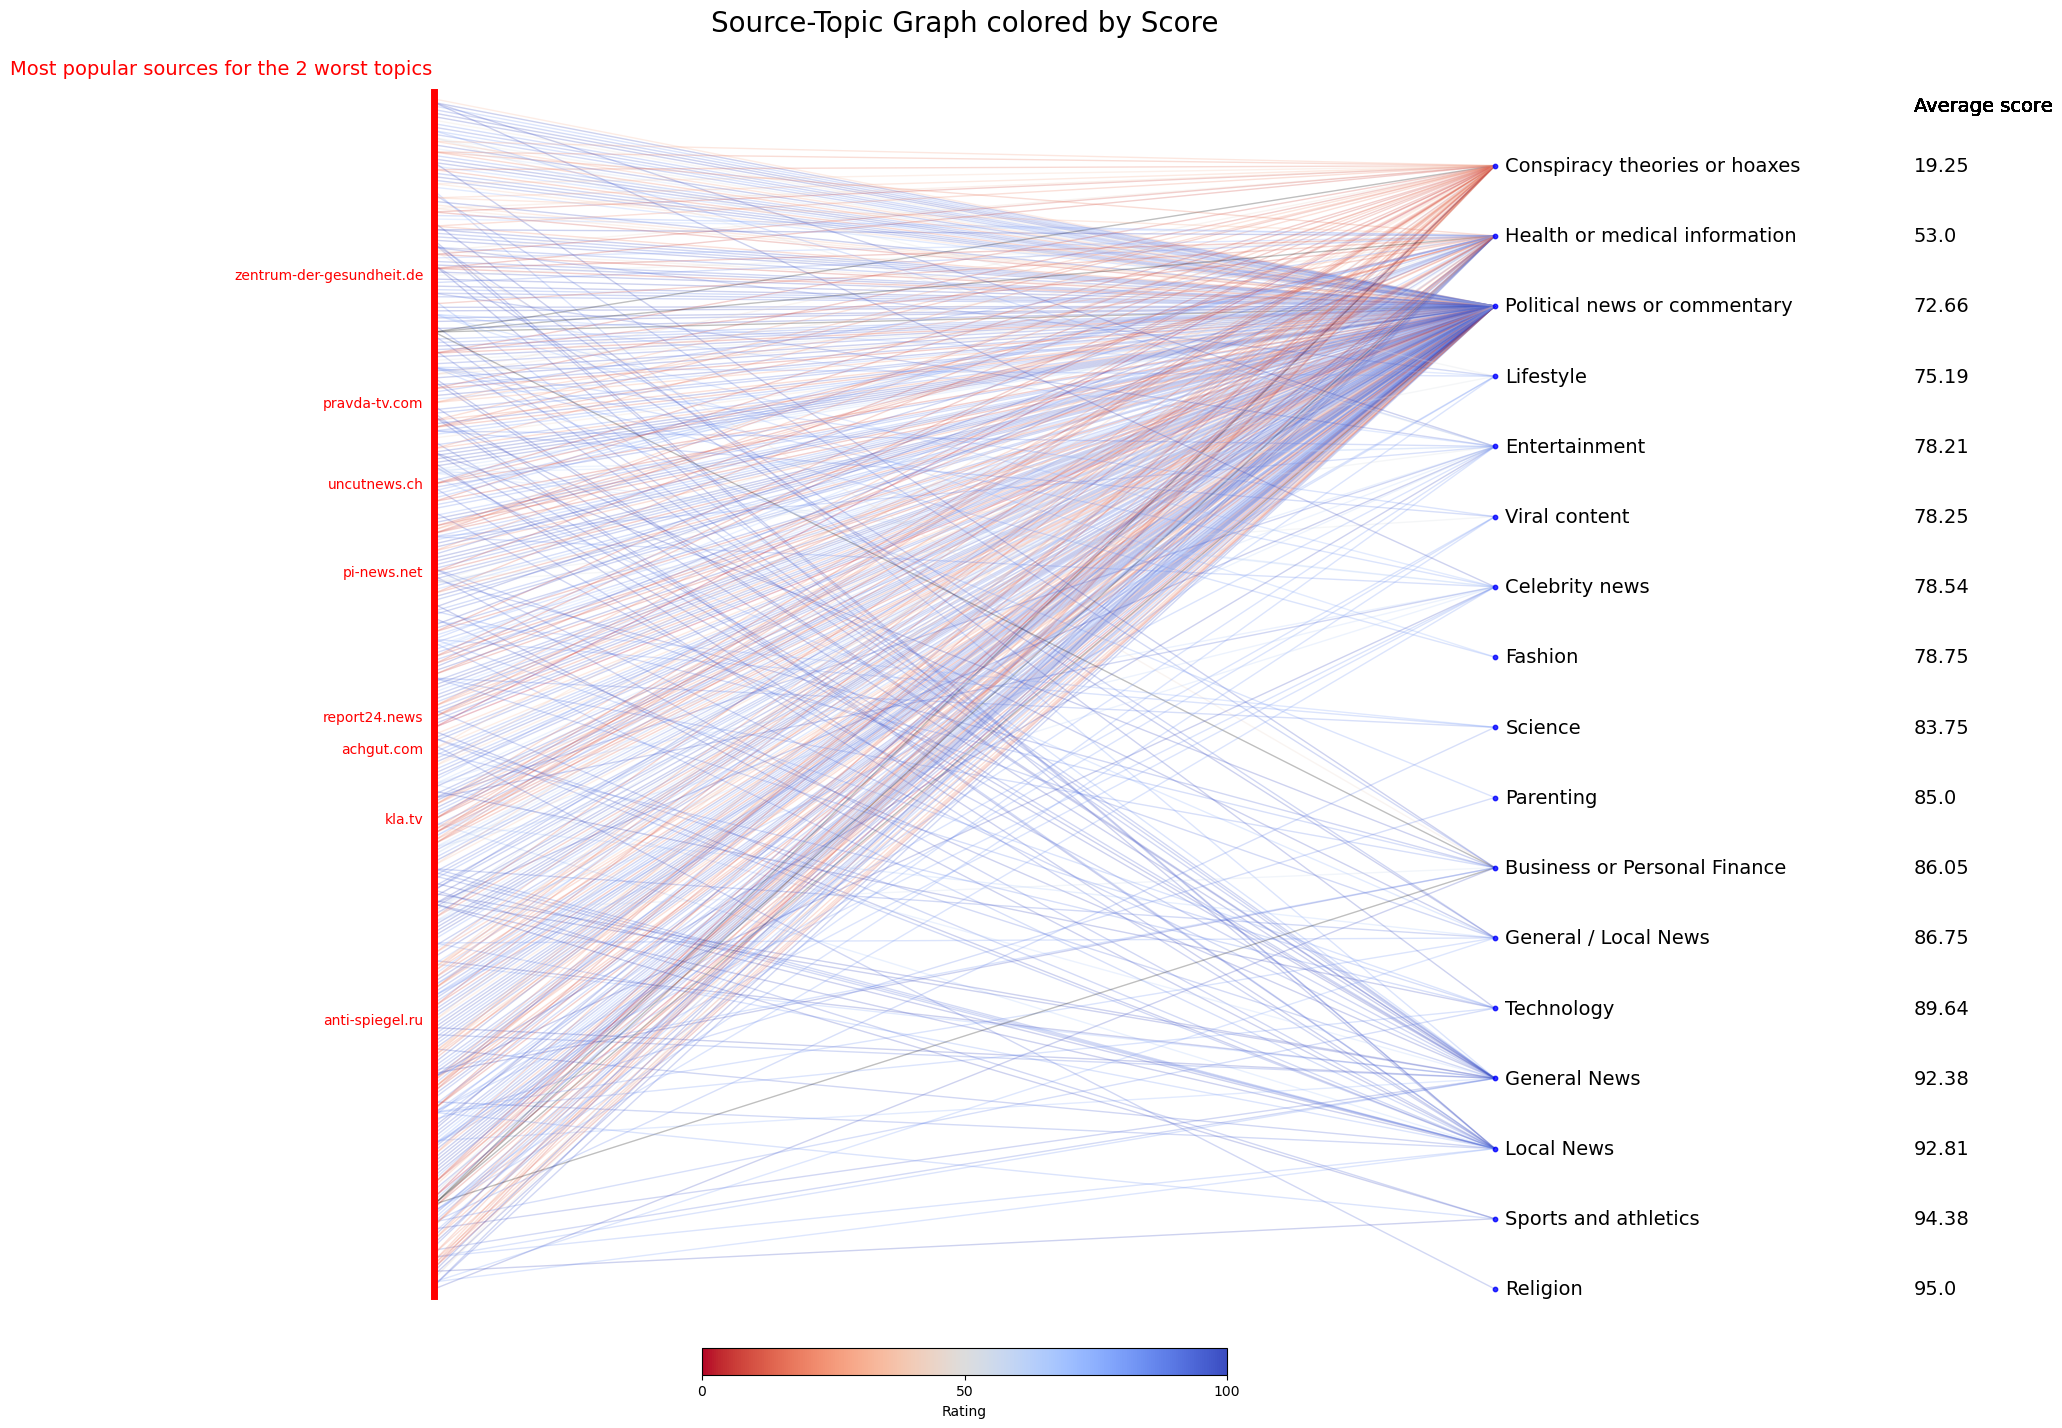

In [55]:
# lets graph this
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# first we need to get the positions of the nodes, sources on the left and topics on the right
non_source_nodes = [v for v in G.nodes() if G.nodes[v]['type']=='topic']
num_non_source_nodes = len(non_source_nodes)
pos={}
len_sources = len(G.nodes())-num_non_source_nodes
# order the source nodes randomly
random_sources=[node for node in G.nodes() if G.nodes[node]['type']=='source']
random.shuffle(random_sources)

for i,node in enumerate(random_sources):
    if G.nodes[node]['type']=='source':
        pos[node]=(-1,len(G.nodes())/len_sources*i*1.2)
        

# initiate mrk table Topic | avg_score 
table = pd.DataFrame(columns=["Topic","avg_score","Source count"])

# order the topic nodes by the average score of the edges
# first get the average score of the edges
for node in non_source_nodes:
    G.nodes[node]['avg_score'] = np.nanmean([edge[2]['score'] for edge in G.edges(node,data=True)])
    # adding row to markdown table topic | avg_score
    G.nodes[node]['count'] = len([edge[2]['score'] for edge in G.edges(node,data=True)])
    table = pd.concat([table,pd.DataFrame([[node,G.nodes[node]['avg_score'],G.nodes[node]["count"]]],columns=["Topic","avg_score","Source count"])],ignore_index=True)
    
# print the table
display((Markdown(table.to_markdown())))
    

# order the nodes by the average score
non_source_nodes = [node for score,node in sorted([(G.nodes[node]['avg_score'],node) for node in non_source_nodes],reverse=True)]

for i,node in enumerate(non_source_nodes):
    pos[node]=(1,len(G.nodes())/num_non_source_nodes*i*1.2)
        



# lets get the edges and their ratings
# the color of the edge will be the rating

# make a color map that goes from blue to red but reverse it so that red is the lowest rating
cmap = plt.cm.coolwarm.reversed()
 
# get the ratings
ratings = [edge[2]['score'] for edge in G.edges(data=True)]


#big graph
plt.figure(figsize=(10,20))

# plotting the edges with the ratings as colors, using the coolwarm colormap
nx.draw_networkx_edges(G,pos,edge_color=ratings,edge_cmap=cmap,edge_vmin=min(ratings),edge_vmax=max(ratings), alpha=0.25)



# Add a straight line at x=-1 on the left
plt.axvline(x=-1, color='r', alpha=1,ymin=0.04,ymax=0.96, linewidth=5,linestyle='-')
# plot topics
nx.draw_networkx_nodes(G,pos,nodelist=[v for v in G.nodes() if G.nodes[v]['type']=='topic'],node_size=10,node_color='b',alpha=0.8)

# adding labels on the right for the topics

# bump the networkx labels more right by 2 pixels
for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in G.nodes() if G.nodes[v]['type']=='topic'},font_size=14, horizontalalignment='left').items():
    t.set_rotation(0)
    t.set_ha('left')
    
    t.set_x(t.get_position()[0]+0.02)
    
    # right to that position add a label with the average score
    
    # get furthermost left position of the node
    
    # assuming you have a text object called t
    
    pos_node = t.get_position()
    pos_node=(pos_node[0]+0.75,pos_node[1])
    node = t.get_text()
    node= G.nodes[node]
    plt.text(pos_node[0]+0.02,pos_node[1],str(round(node['avg_score'],2)),horizontalalignment='left',verticalalignment='center',transform=plt.gca().transData, fontsize=14)
    
    # print on top that this is the average score
    plt.text(pos_node[0]+0.02,len_sources*1.25,"Average score",horizontalalignment='left',verticalalignment='center',transform=plt.gca().transData,fontsize=14)


worse_2_non_sources = [node for score,node in sorted([(G.nodes[node]['avg_score'],node) for node in non_source_nodes],reverse=False)[:2]]

# get top 5 sources by similarweb for each of the 2 worst topics
bad_sources = []
for non_source in worse_2_non_sources:
    bad_sources_nodes=[edge[1] for edge in G.edges(non_source,data=True)]
    # keep only "N" rated nodes
    bad_sources_nodes = [node for node in bad_sources_nodes if G.nodes[node]['rating']=="N"]
    # sort them by similarweb rank
    bad_sources_nodes = sorted(bad_sources_nodes,key=lambda x:G.nodes[x]['ranking'])[:5]
    print(bad_sources_nodes)
    bad_sources.extend(bad_sources_nodes)
    
# add a label for the top 5 sources by ranking, bump it left by 2 pixels
for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in bad_sources},font_size=10, horizontalalignment='left', font_color="r").items():
    t.set_rotation(0)
    t.set_ha('right')
    t.set_x(t.get_position()[0]-0.02)

# # get good sources
# good_sources = [v for v in G.nodes() if G.nodes[v]['type']=='source' and G.nodes[v]['rating']=="T"]
# # add a label to the top 5 sources by ranking, bump it left by 2 pixels
# for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in sorted(good_sources,key=lambda x:G.nodes[x]['ranking'])[:5]},font_size=10, horizontalalignment='left', font_color="b").items():
#     t.set_rotation(0)
#     t.set_ha('right')
#     t.set_x(t.get_position()[0]-0.02)
    
    
# # get bad sources
# bad_sources = [v for v in G.nodes() if G.nodes[v]['type']=='source' and G.nodes[v]['rating']=="N"]

# add a label to the top 5 bad sources by ranking, bump it left by 2 pixels
# for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in sorted(bad_sources,key=lambda x:G.nodes[x]['ranking'])[:5]},font_size=10, horizontalalignment='left', font_color="r").items():
#     t.set_rotation(0)
#     t.set_ha('right')
#     t.set_x(t.get_position()[0]-0.02)
    
    
    



plt.axis('off')
# adding the cmap as a colorbar, at the bottom
cbar=plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap),label='Rating',orientation='horizontal',shrink=0.3,pad=0)
cbar.set_ticks([0,0.5,1])
cbar.set_ticklabels(['0',"50",'100'])

plt.margins(x=0.25, y=0)
plt.subplots_adjust(right=1.75, left=0)
plt.title("Source-Topic Graph colored by Score", fontsize=20)
ymax=plt.ylim()[1]

plt.text(-1.80,ymax*0.95+10, "Most popular sources for the 2 worst topics", fontsize=14, color="r")

# # add a legend on the top left saying "Top 5 Good Sources" and "Top 5 Bad Sources"
# plt.text(-1.5,plt.ylim()[1]*0.95+10, "Top 5 Good Sources", fontsize=14, color="b")
# plt.text(-1.5,plt.ylim()[1]*0.95, "Top 5 Bad Sources", fontsize=14, color="r")
# saving graph in hq
plt.savefig('source_topic_graph.png', dpi=300, bbox_inches='tight')

plt.show()


In [56]:
# make a df with the sources, their attributes and the topics they are connected to
source_df = pd.DataFrame(columns=["Source","Rating","Score","Ranking","Topics"])
source_df["Source"] = [v for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Score"] = [G.nodes[v]['score'] for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Rating"] = [G.nodes[v]['rating'] for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Ranking"] = [G.nodes[v]['ranking'] for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Topics"] = [[edge[1] for edge in G.edges(v) if G.nodes[edge[1]]['type']=='topic'] for v in G.nodes() if G.nodes[v]['type']=='source']

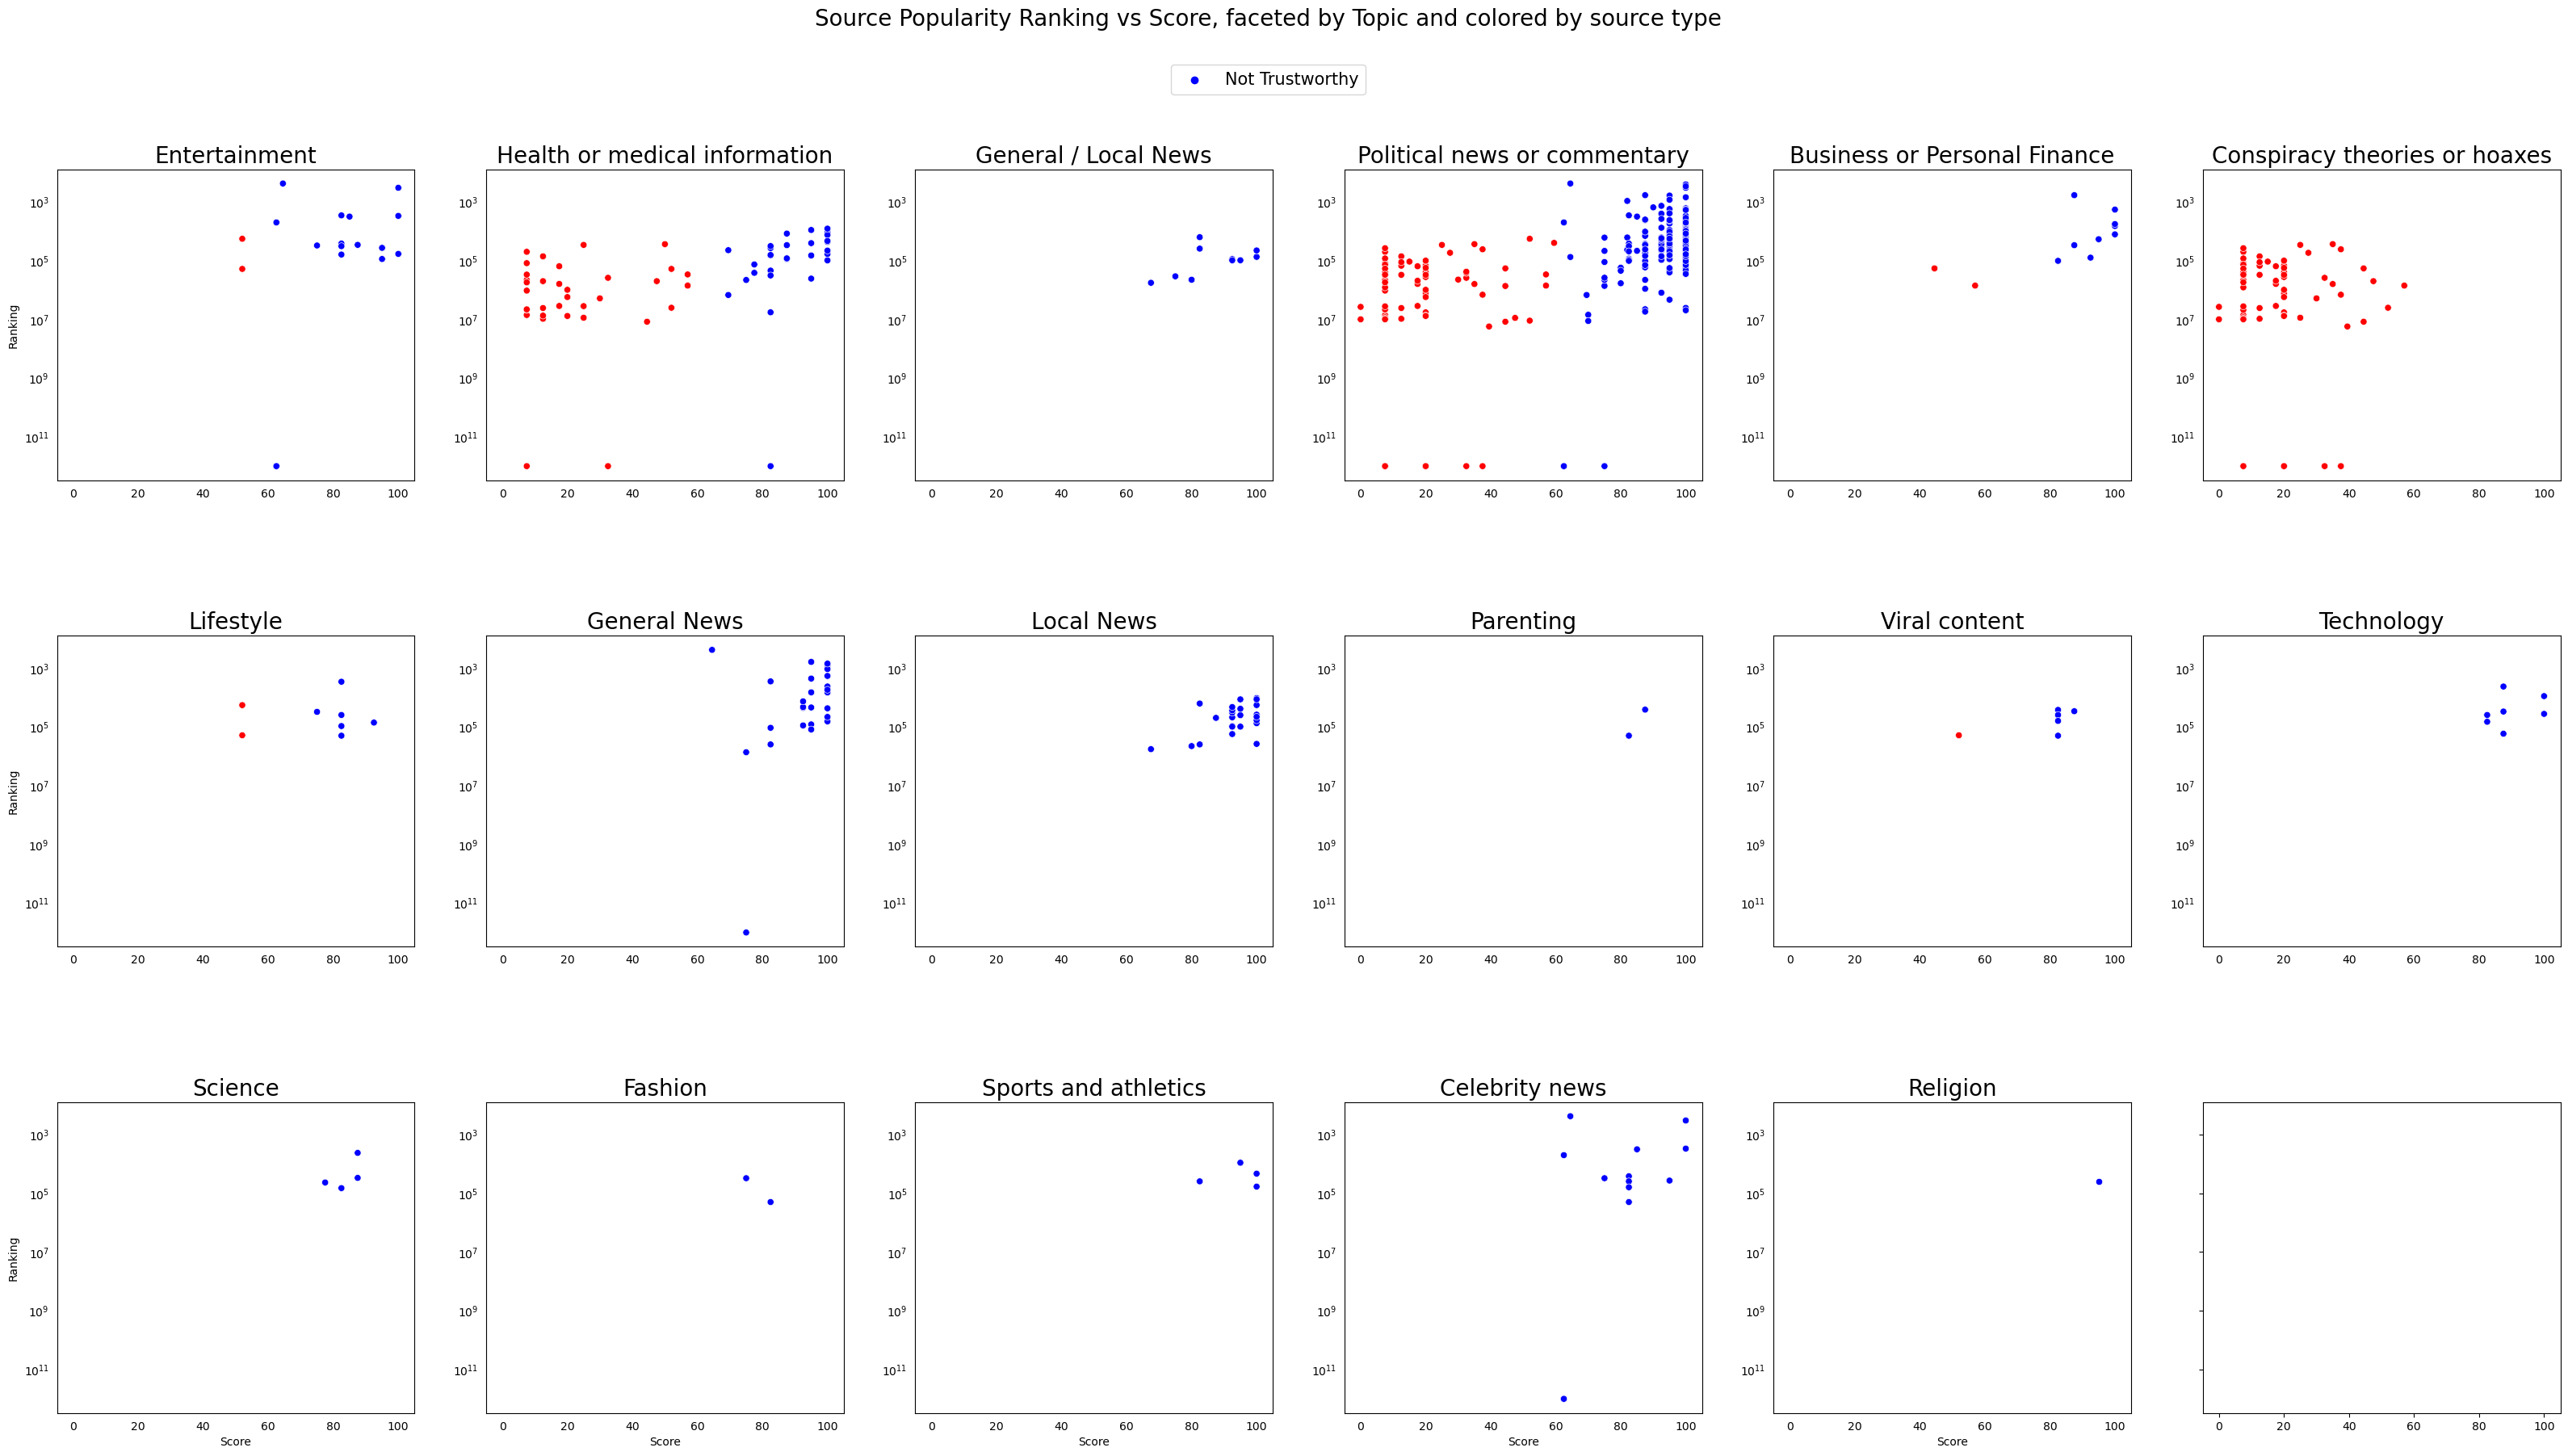

In [57]:
# faceted plot log ranking by score, facted by topic
import seaborn as sns
import matplotlib
topics=set([topic for sublist in source_df["Topics"] for topic in sublist])
lent= len(topics)
fig, axs = plt.subplots(3,6,figsize=(40,20),sharey=True, sharex=True,)
# make it show the ticks labels everywhere despite sharing it

# make every subplot taller
fig.subplots_adjust(hspace=0.5)
for topic in topics:
    topic_df = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    # get the axes for this topic
    ax=axs.flatten()[list(topics).index(topic)]
    
    # dictionary for hues T is blue, N is red
    hues={"T":"b","N":"r","P":"w"}

    # plot the scatterplot, use the hues dict for the colot
    sns.scatterplot(data=topic_df, x="Score", y="Ranking", hue="Rating", palette=hues, ax=ax)
    ax.set_title(topic)
    ax.set_yscale('log')
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # turn off legend
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    # make subplot title bigger
    ax.title.set_size(20)

fig.suptitle("Source Popularity Ranking vs Score, faceted by Topic and colored by source type", fontsize=20)
# make a global legend, with the color of the Rating
fig.legend(labels=["Not Trustworthy","Trustworthy"], loc='upper center', ncol=2, fontsize=15, handles=handles, bbox_to_anchor=(0.5, 0.95))

# substitute T and N with Trastworthy and Not Trustworthy in the legneds

plt.show()


In [58]:
# group by topic and get the top 5 sources by ranking for each rating
for topic in topics:
    topic_df = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    topic_df = topic_df.sort_values("Ranking")[["Source","Ranking","Score","Rating"]]
    top_5_pos=topic_df[topic_df["Rating"]=="T"].head(5)
    top_5_neg=topic_df[topic_df["Rating"]=="N"].head(5)
    display(Markdown("### Most popular positive sources for Topic: "+topic))
    display(Markdown(top_5_pos.to_markdown()))
    display(Markdown("### Most popular negative sources for Topic: "+topic))
    display(Markdown(top_5_neg.to_markdown()))
    
    

### Most popular positive sources for Topic: Entertainment

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
|  53 | bild.de      |       235 |    64.5 | T        |
| 212 | gmx.net      |       329 |   100   | T        |
| 329 | vice.com     |      2864 |    82.5 | T        |
|  92 | tz.de        |      2983 |   100   | T        |
| 300 | derwesten.de |      3151 |    85   | T        |

### Most popular negative sources for Topic: Entertainment

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
| 227 | servustv.com |     17954 |      52 | N        |
| 225 | heftig.de    |    191154 |      52 | N        |

### Most popular positive sources for Topic: Health or medical information

|     | Source               |   Ranking |   Score | Rating   |
|----:|:---------------------|----------:|--------:|:---------|
| 222 | utopia.de            |      8106 |   100   | T        |
|  83 | presseportal.de      |      9019 |    95   | T        |
| 147 | apotheken-umschau.de |     10897 |   100   | T        |
| 125 | netdoktor.de         |     11950 |    87.5 | T        |
| 151 | spektrum.de          |     13261 |   100   | T        |

### Most popular negative sources for Topic: Health or medical information

|     | Source                    |   Ranking |   Score | Rating   |
|----:|:--------------------------|----------:|--------:|:---------|
| 101 | zentrum-der-gesundheit.de |     27395 |    50   | N        |
| 277 | pravda-tv.com             |     29054 |    25   | N        |
|  88 | uncutnews.ch              |     49898 |     7.5 | N        |
| 238 | report24.news             |     71212 |    12.5 | N        |
|  46 | kla.tv                    |    121638 |     7.5 | N        |

### Most popular positive sources for Topic: General / Local News

|     | Source               |   Ranking |   Score | Rating   |
|----:|:---------------------|----------:|--------:|:---------|
| 231 | tt.com               |     15838 |    82.5 | T        |
| 137 | gentside.de          |     38914 |    82.5 | T        |
| 254 | bw24.de              |     44909 |   100   | T        |
|  50 | siegener-zeitung.de  |     74207 |   100   | T        |
|  21 | esslinger-zeitung.de |     88376 |    92.5 | T        |

### Most popular negative sources for Topic: General / Local News

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Political news or commentary

|     | Source      |   Ranking |   Score | Rating   |
|----:|:------------|----------:|--------:|:---------|
|  53 | bild.de     |       235 |    64.5 | T        |
| 199 | t-online.de |       253 |   100   | T        |
| 214 | web.de      |       292 |   100   | T        |
| 212 | gmx.net     |       329 |   100   | T        |
|  27 | n-tv.de     |       587 |    87.5 | T        |

### Most popular negative sources for Topic: Political news or commentary

|     | Source          |   Ranking |   Score | Rating   |
|----:|:----------------|----------:|--------:|:---------|
| 227 | servustv.com    |     17954 |    52   | N        |
| 213 | reitschuster.de |     24803 |    59.5 | N        |
|  90 | achgut.com      |     27310 |    35   | N        |
| 277 | pravda-tv.com   |     29054 |    25   | N        |
|  91 | pi-news.net     |     37574 |     7.5 | N        |

### Most popular positive sources for Topic: Business or Personal Finance

|     | Source             |   Ranking |   Score | Rating   |
|----:|:-------------------|----------:|--------:|:---------|
|  27 | n-tv.de            |       587 |    87.5 | T        |
| 179 | faz.net            |      1819 |   100   | T        |
| 140 | handelsblatt.com   |      5660 |   100   | T        |
| 106 | businessinsider.de |      6593 |   100   | T        |
| 258 | deraktionaer.de    |     12692 |   100   | T        |

### Most popular negative sources for Topic: Business or Personal Finance

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
|  47 | mmnews.de     |    183166 |    44.5 | N        |
| 107 | neopresse.com |    706797 |    57   | N        |

### Most popular positive sources for Topic: Conspiracy theories or hoaxes

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular negative sources for Topic: Conspiracy theories or hoaxes

|     | Source          |   Ranking |   Score | Rating   |
|----:|:----------------|----------:|--------:|:---------|
|  90 | achgut.com      |     27310 |    35   | N        |
| 277 | pravda-tv.com   |     29054 |    25   | N        |
|  91 | pi-news.net     |     37574 |     7.5 | N        |
| 275 | anti-spiegel.ru |     40976 |    37.5 | N        |
|  88 | uncutnews.ch    |     49898 |     7.5 | N        |

### Most popular positive sources for Topic: Lifestyle

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
| 329 | vice.com      |      2864 |    82.5 | T        |
| 250 | vogue.de      |     30423 |    75   | T        |
| 137 | gentside.de   |     38914 |    82.5 | T        |
| 301 | jetzt.de      |     70551 |    92.5 | T        |
| 123 | tip-berlin.de |     92708 |    82.5 | T        |

### Most popular negative sources for Topic: Lifestyle

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
| 227 | servustv.com |     17954 |      52 | N        |
| 225 | heftig.de    |    191154 |      52 | N        |

### Most popular positive sources for Topic: General News

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
|  53 | bild.de       |       235 |    64.5 | T        |
| 176 | tagesschau.de |       605 |    95   | T        |
| 190 | focus.de      |       692 |   100   | T        |
|  39 | spiegel.de    |       805 |   100   | T        |
| 172 | zdf.de        |      1059 |   100   | T        |

### Most popular negative sources for Topic: General News

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Local News

|     | Source                     |   Ranking |   Score | Rating   |
|----:|:---------------------------|----------:|--------:|:---------|
|  71 | ruhrnachrichten.de         |     10345 |   100   | T        |
| 331 | stuttgarter-nachrichten.de |     11417 |   100   | T        |
| 122 | abendblatt.de              |     11419 |    95   | T        |
| 231 | tt.com                     |     15838 |    82.5 | T        |
| 168 | freiepresse.de             |     17873 |   100   | T        |

### Most popular negative sources for Topic: Local News

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Parenting

|    | Source    |   Ranking |   Score | Rating   |
|---:|:----------|----------:|--------:|:---------|
| 26 | eltern.de |     25555 |    87.5 | T        |
| 43 | miss.at   |    197521 |    82.5 | T        |

### Most popular negative sources for Topic: Parenting

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Viral content

|     | Source          |   Ranking |   Score | Rating   |
|----:|:----------------|----------:|--------:|:---------|
| 136 | rollingstone.de |     26105 |    82.5 | T        |
| 259 | buzzfeed.de     |     28943 |    87.5 | T        |
| 137 | gentside.de     |     38914 |    82.5 | T        |
| 260 | faktastisch.de  |     61839 |    82.5 | T        |
|  43 | miss.at         |    197521 |    82.5 | T        |

### Most popular negative sources for Topic: Viral content

|     | Source    |   Ranking |   Score | Rating   |
|----:|:----------|----------:|--------:|:---------|
| 225 | heftig.de |    191154 |      52 | N        |

### Most popular positive sources for Topic: Technology

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
|  70 | heise.de      |      4171 |    87.5 | T        |
| 164 | golem.de      |      8859 |   100   | T        |
|  33 | futurezone.at |     29701 |    87.5 | T        |
| 116 | t3n.de        |     35680 |   100   | T        |
| 137 | gentside.de   |     38914 |    82.5 | T        |

### Most popular negative sources for Topic: Technology

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Science

|     | Source                |   Ranking |   Score | Rating   |
|----:|:----------------------|----------:|--------:|:---------|
|  70 | heise.de              |      4171 |    87.5 | T        |
|  33 | futurezone.at         |     29701 |    87.5 | T        |
| 257 | nationalgeographic.de |     42587 |    77.5 | T        |
|  63 | scinexx.de            |     66226 |    82.5 | T        |

### Most popular negative sources for Topic: Science

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Fashion

|     | Source   |   Ranking |   Score | Rating   |
|----:|:---------|----------:|--------:|:---------|
| 250 | vogue.de |     30423 |    75   | T        |
|  43 | miss.at  |    197521 |    82.5 | T        |

### Most popular negative sources for Topic: Fashion

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Sports and athletics

|     | Source            |   Ranking |   Score | Rating   |
|----:|:------------------|----------:|--------:|:---------|
|  83 | presseportal.de   |      9019 |    95   | T        |
| 180 | fitforfun.de      |     21271 |   100   | T        |
| 137 | gentside.de       |     38914 |    82.5 | T        |
|  98 | fuldaerzeitung.de |     58780 |   100   | T        |

### Most popular negative sources for Topic: Sports and athletics

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Celebrity news

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
|  53 | bild.de      |       235 |    64.5 | T        |
| 212 | gmx.net      |       329 |   100   | T        |
|  92 | tz.de        |      2983 |   100   | T        |
| 300 | derwesten.de |      3151 |    85   | T        |
| 236 | oe24.at      |      4983 |    62.5 | T        |

### Most popular negative sources for Topic: Celebrity news

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Religion

|    | Source        |   Ranking |   Score | Rating   |
|---:|:--------------|----------:|--------:|:---------|
| 32 | katholisch.de |     39391 |      95 | T        |

### Most popular negative sources for Topic: Religion

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

# Orientation

Let's see what does the political orientation tells us

In [59]:
df_de.Orientation.value_counts()

Orientation
Far Right         204
Slightly Left     194
Slightly Right    118
Right              57
Far Left           54
Left               14
Name: count, dtype: int64

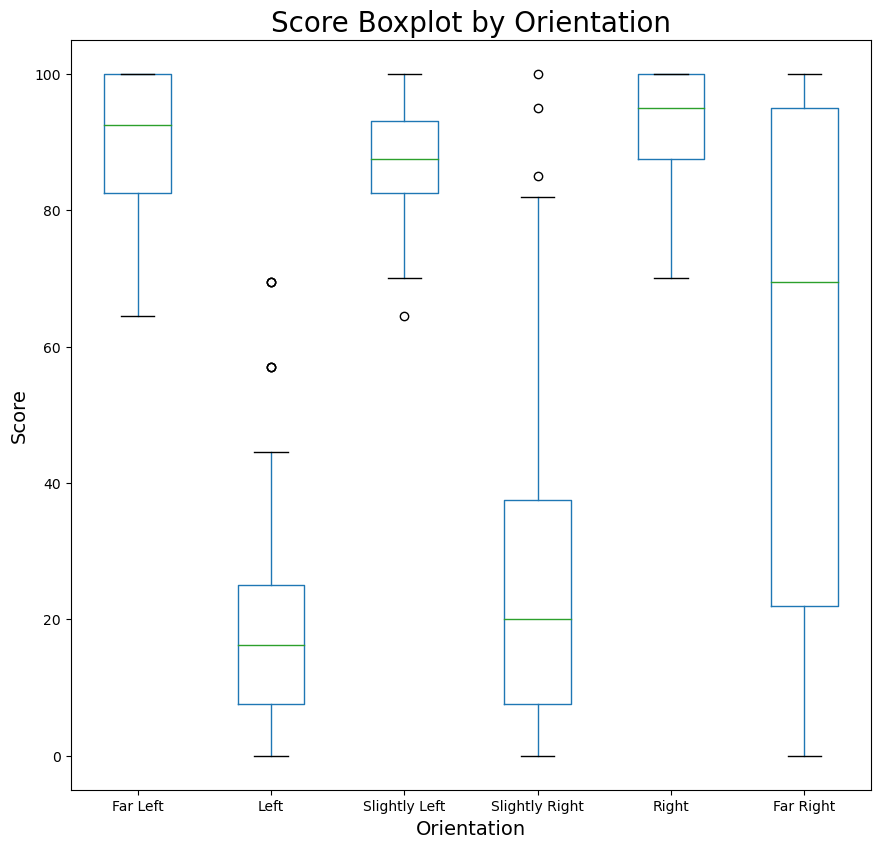

In [60]:
# score boxplot by orientation
df_de.boxplot(column="Score",by="Orientation",figsize=(10,10))

plt.title("Score Boxplot by Orientation", fontsize=20)
plt.suptitle("")
plt.xlabel("Orientation", fontsize=14)
plt.xticks([1,2,3,4,5,6],['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'],rotation=0)
plt.ylabel("Score", fontsize=14)
# remove grid
plt.grid(False)


Let's see a violinplot to see the distribution as well

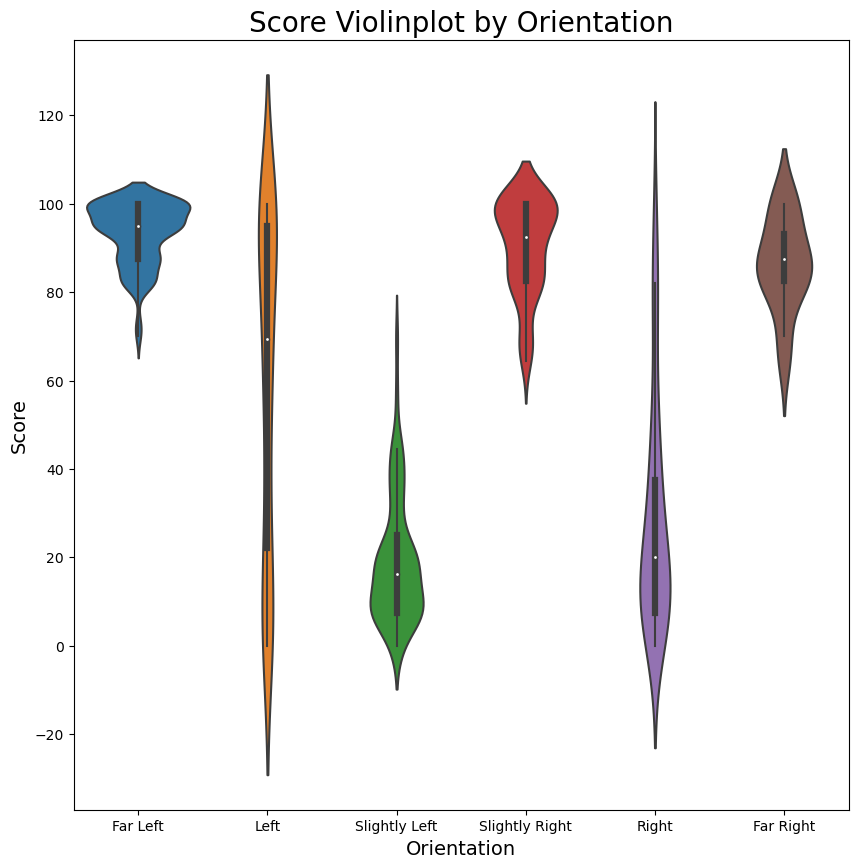

In [61]:
# make a violinpolt of the score by orientation
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x="Orientation", y="Score", data=df_de, ax=ax)
ax.set_title("Score Violinplot by Orientation", fontsize=20)
ax.set_xlabel("Orientation", fontsize=14)
ax.set_xticklabels(['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'],rotation=0)
ax.set_ylabel("Score", fontsize=14)
plt.show()

C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\3213705409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['Orientation'] = df_de['Orientation'].replace({'Far Left':-1,'Slightly Left':-0.25,'Left':-0.5,'Center':0,'Right':0.5,'Slightly Right':0.25,'Far Right':1})


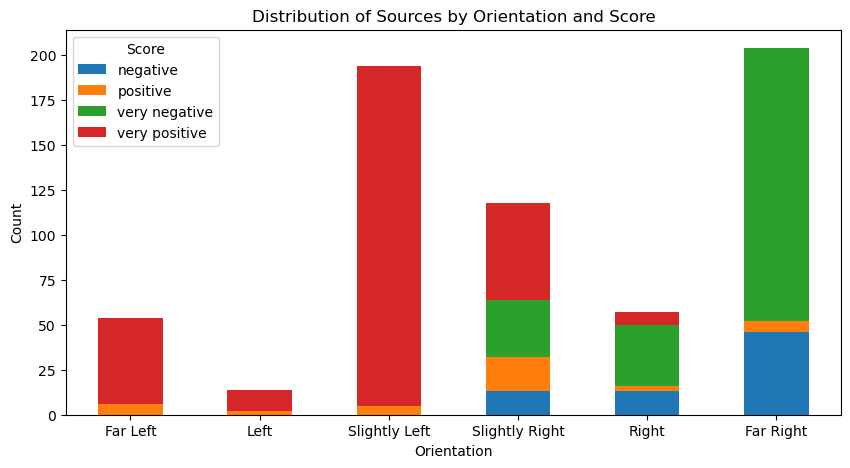

In [62]:


# make Orientation be a scale that goes from Far Left to Far right
df_de['Orientation'] = df_de['Orientation'].replace({'Far Left':-1,'Slightly Left':-0.25,'Left':-0.5,'Center':0,'Right':0.5,'Slightly Right':0.25,'Far Right':1})
# plot counts per orientation category, colored by score (group by score_cat), for the first date of the dataset
df_de.groupby(['Orientation','score_cat']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

# put the labels on the bars
plt.xticks([0,1,2,3,4,5],['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'],rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Sources by Orientation and Score")

# set the legend title
plt.legend(title="Score")


plt.show()

Those plots are misleading, because they treat the aggregate data over the years, repeating the same sources/spanning different categorization methods. Let's see how the categorization changed over the years

C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\292548668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de.Orientation.replace({-1:'Far Left',-0.25:'Slightly Left',-0.5:'Left',0.5:'Right',0.25:'Slightly Right',1:'Far Right'},inplace=True)
C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\292548668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de.Orientation = pd.Categorical(df_de.Orientation, categories=['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'], ordered=True)
C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\2925

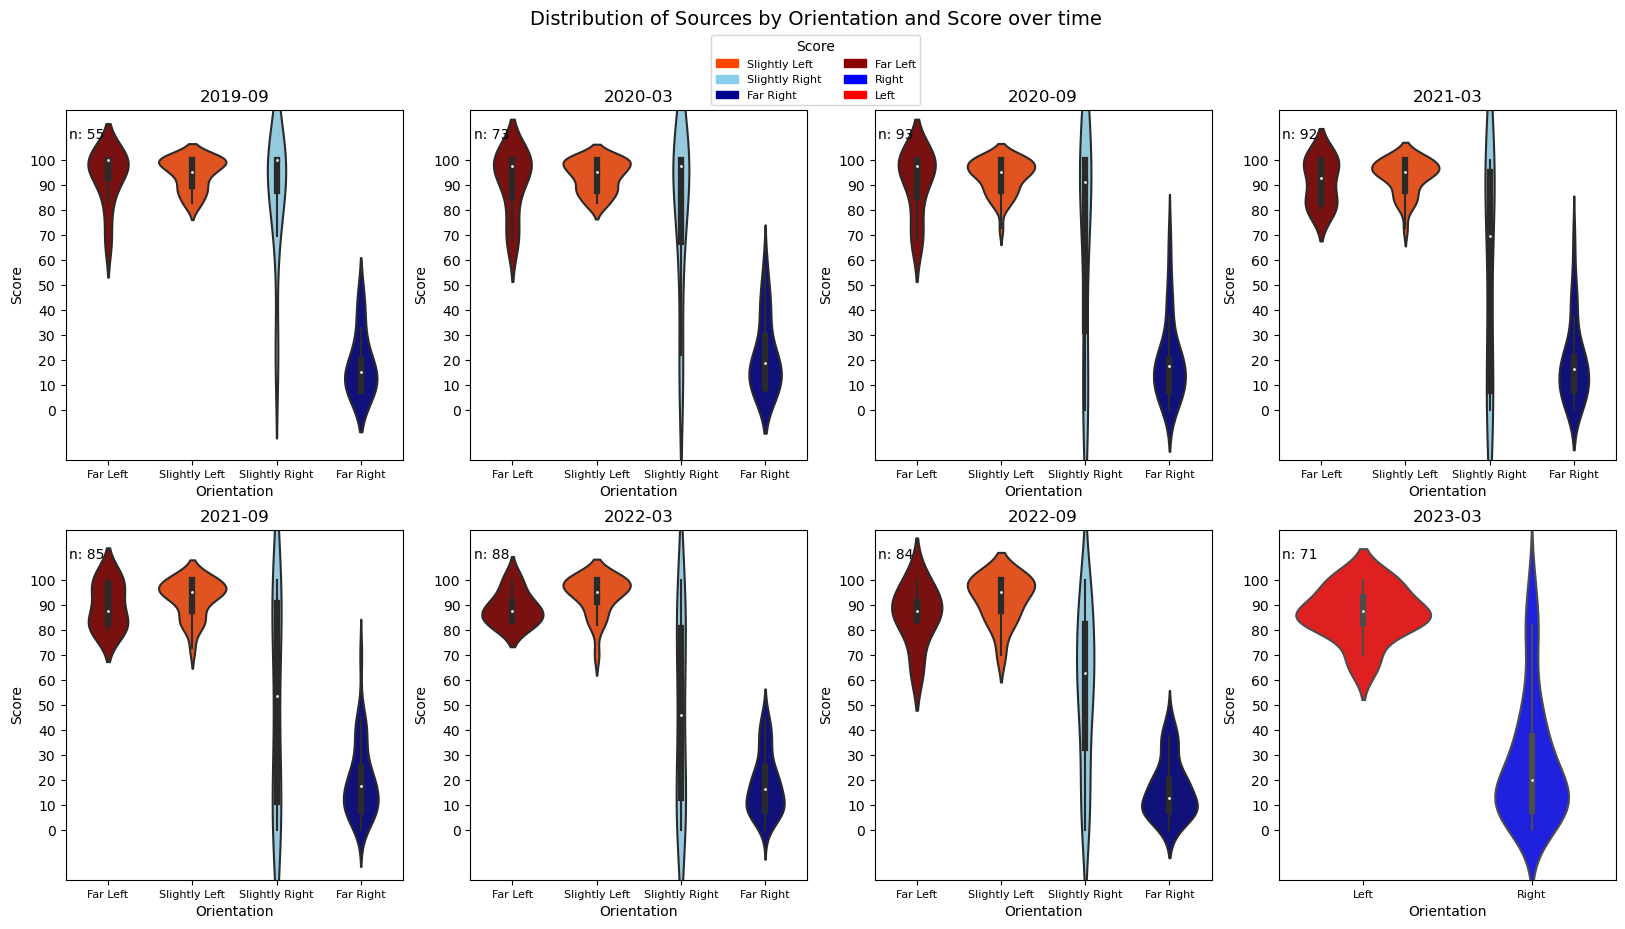

In [63]:
df_de.Orientation.replace({-1:'Far Left',-0.25:'Slightly Left',-0.5:'Left',0.5:'Right',0.25:'Slightly Right',1:'Far Right'},inplace=True)
# make orientation an ordered categorical variable
df_de.Orientation = pd.Categorical(df_de.Orientation, categories=['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'], ordered=True)

# make a tall fig with 8 subplots
fig, axs=plt.subplots(2,4,figsize=(80, 80), sharey=False)

# left red, far left dark red slightly left orange, slightly right sky blue, slightly right blue, right black
colors={"Left":"r","Far Left":"darkred","Slightly Left":"orangered","Slightly Right":"skyblue","Right":"b","Far Right":"darkblue","Undefined":"gray"}
# for each date, print the number of sources per orientation
for date in df_de.file_date.unique():
    df_date=df_de[df_de.file_date==date] 
    df_date.Orientation=df_date.Orientation.cat.add_categories("Undefined")
    df_date.Orientation.fillna("Undefined",inplace=True)
    # get ax 
    ax=axs.flatten()[list(df_de.file_date.unique()).index(date)]
    # drop undefined
    df_date=df_date[df_date.Orientation!="Undefined"]
    # remove categories with no data
    df_date.Orientation=df_date.Orientation.cat.remove_unused_categories()
    
    # plot the violin plot grouping by orientation 
    sns.violinplot(x="Orientation", y="Score", data=df_date, ax=ax, palette=colors)
    # formatted date as title
    axs.flatten()[list(df_de.file_date.unique()).index(date)].set_title(date.strftime("%Y-%m"))
    # get handles and disable legend
    axs.flatten()[list(df_de.file_date.unique()).index(date)].legend().set_visible(False)
    
    # delete all the ticks that are not between 0 and 100
    ax.set_yticks(np.arange(0, 101, 10))

    # add padding to the top of the plot
    ax.margins(y=0.001)
    ax.set_ylim(-20,120 )
    
    
    #handles, labels = axs.flatten()[list(df_de.file_date.unique()).index(date)].get_legend_handles_labels()
    
    # ticks on the x axis horizontal and smaller
    axs.flatten()[list(df_de.file_date.unique()).index(date)].tick_params(axis="x", rotation=0, labelsize=8)
    # make subplot more spaced
    axs.flatten()[list(df_de.file_date.unique()).index(date)].margins(y=0.1)
    # print on the up left of the plot the number of sources
    axs.flatten()[list(df_de.file_date.unique()).index(date)].text(0.01, 0.95, "n: "+str(len(df_date.loc[df_date.Orientation.notna(),])),verticalalignment='top', horizontalalignment='left', transform=axs.flatten()[list(df_de.file_date.unique()).index(date)].transAxes, fontsize=10)
    
    
# title
fig.suptitle("Distribution of Sources by Orientation and Score over time", fontsize=14)


# make a legend from all the colors
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in df_de.Orientation.unique().dropna()]
labels = df_de.Orientation.unique().dropna()
fig.legend(title="Score", handles=handles, labels=labels, loc='upper center', ncol=2, fontsize=8, bbox_to_anchor=(0.5, 0.96))



# more vertical space between subplots
axs.flatten()[0].margins(y=1)

fig.set_figheight(10)
fig.set_figwidth(20)
fig.savefig("violinplot_orientation.png", dpi=300, bbox_inches='tight')
plt.show()


So, in the last year they are using only this Left/Right distinction, nevertheless, the phenomenon of left wing getting better scores endures

Apparently, right wing leaning sources tend to get lower scores. I propose two possible explanations:
1. Bias by the rating agency (could be a bit but I think it's unlikely to explain this contrast)
2. As an American comedian once said, "Reality has a well known liberal bias"

Let's see how does orientation work in the latest df

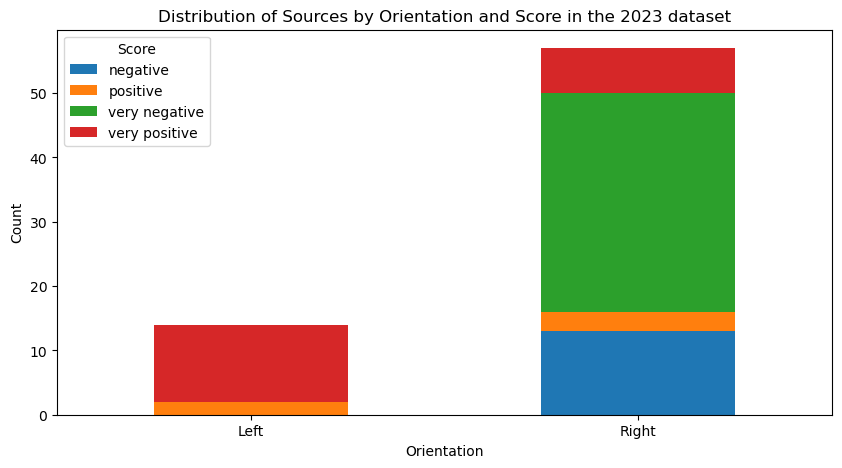

In [64]:
df_de_last["Orientation"]=df_de_last["Orientation"].replace({"Left":-1,"Right":1})
df_de_last.replace({-1:"Left",1:"Right"},inplace=True)
df_de_last['Orientation'] =pd.Categorical(df_de_last['Orientation'], categories=['Left','Right'], ordered=True)
df_de_last.groupby(['Orientation','score_cat']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

# put the labels on the bars
plt.xticks([0,1],['Left','Right'],rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Sources by Orientation and Score in the 2023 dataset")

# set the legend title
plt.legend(title="Score")


plt.show()

More simplistic but still the same result - left wing sources tend to be more reliable

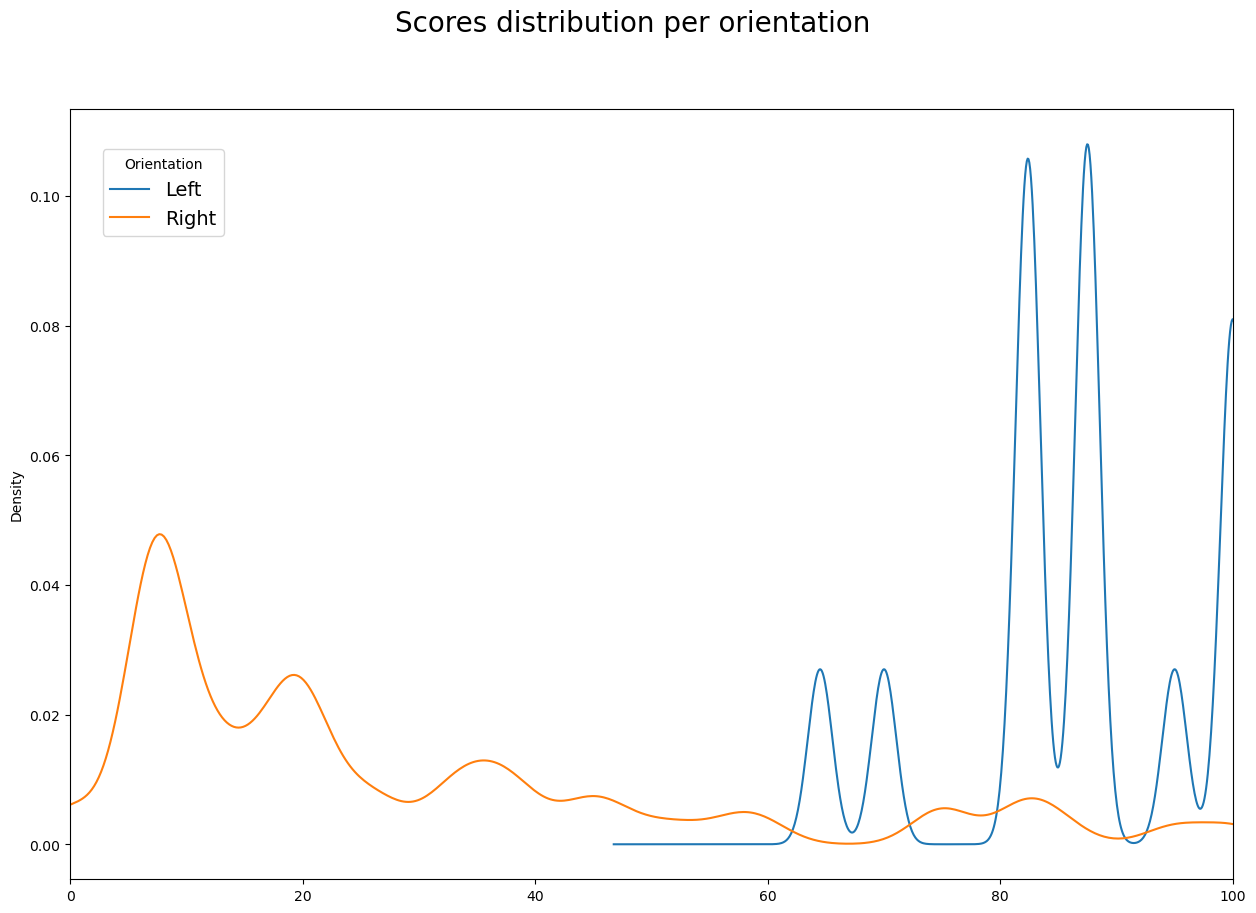

In [65]:
# kdi density plot of the score by orientation
df_de_last=df_de_last[df_de_last.Score.notna()]
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Scores distribution per orientation', fontsize=20)
for orientation in ["Left","Right"]:
    # density plot that starts from 0 and ends at 100
    df_de_last[df_de_last.Orientation==orientation].Score.plot.kde(ax=ax, xlim=(0,100), label=orientation, bw_method=0.1)
    

# put a legend inside the axes on the upper left
fig.legend(loc="upper left", title="Orientation", bbox_to_anchor=(0.14, 0.85), fontsize=14)


In [66]:
df_de_last.Orientation.unique()

[NaN, 'Right', 'Left']
Categories (2, object): ['Left' < 'Right']

In [67]:
df_de_last.groupby(['Score','Orientation']).value_counts()

Series([], Name: count, dtype: int64)

# Topic - Orientation interaction

Let's see if something can be said about the distribution of sources of various orientations between topics 

In [68]:
source_df["Orientation"] = source_df["Source"].apply(lambda x: df_de_last[df_de_last["Domain"]==x]["Orientation"].values[0] if x in df_de_last["Domain"].values else None)

In [69]:
source_df.Orientation.value_counts()

Orientation
Right    57
Left     14
Name: count, dtype: int64

In [70]:
source_df.columns

Index(['Source', 'Rating', 'Score', 'Ranking', 'Topics', 'Orientation'], dtype='object')

In [71]:
# drop sources without scores 
source_df.dropna(subset=["Score"],inplace=True)

We don't many sources or political leaning nuance in this latest dataset, but we can still see how they relate to topics

In [72]:
17*2*5

170

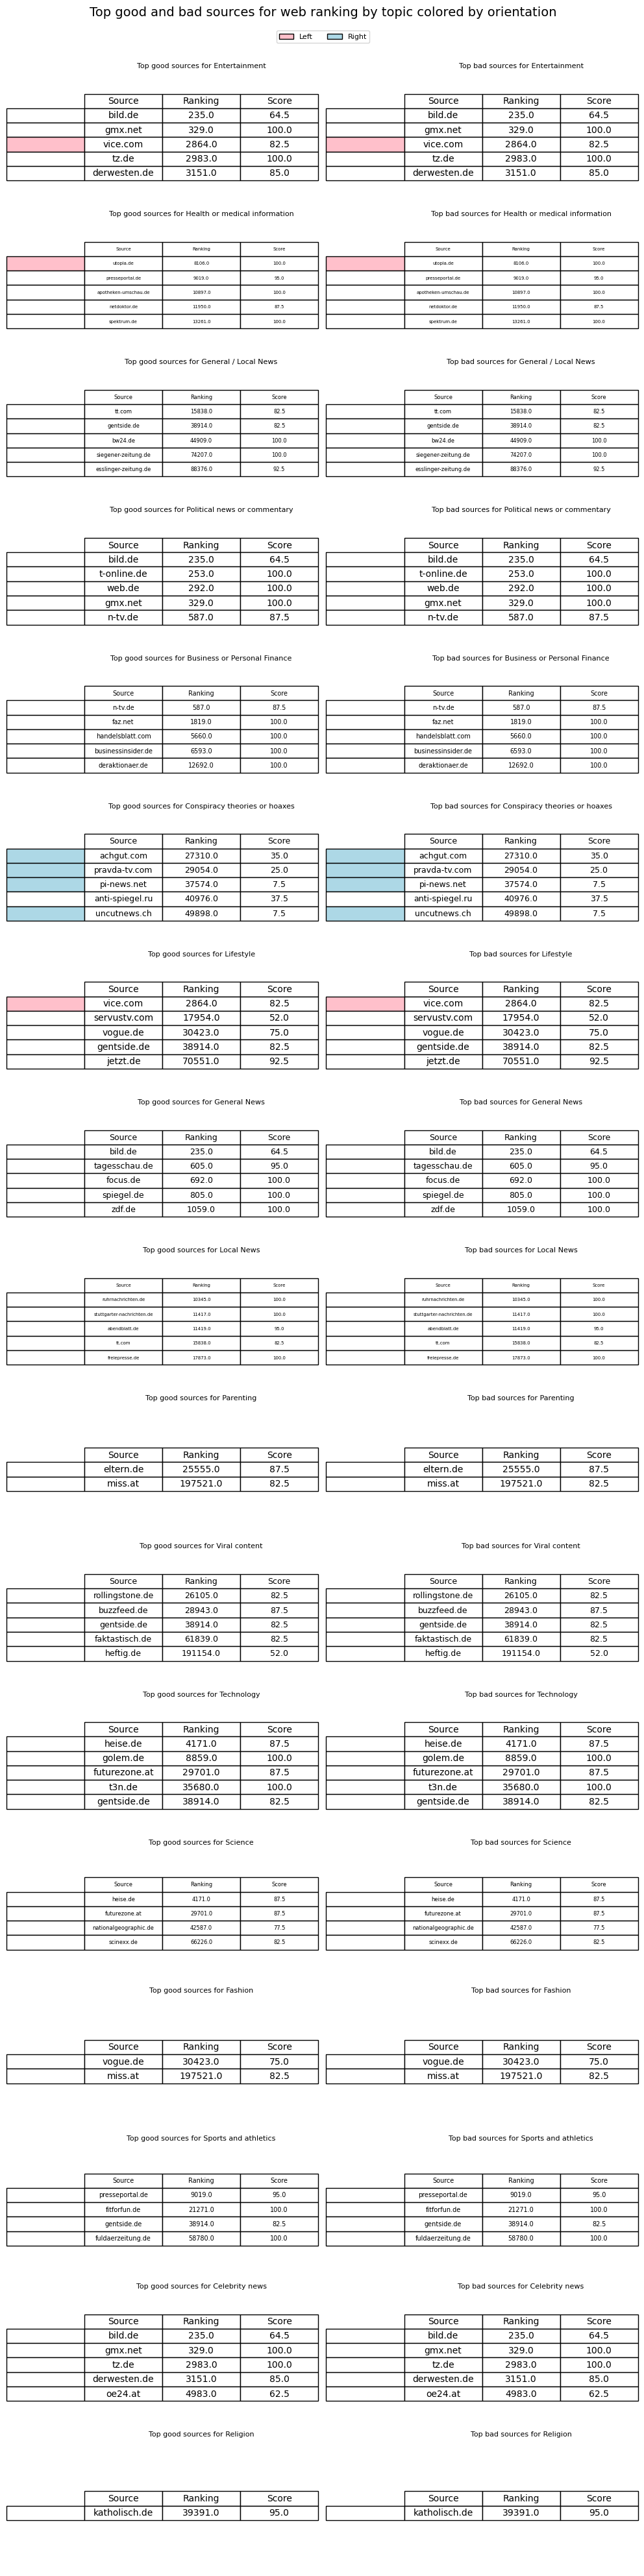

In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
#import patch
from matplotlib.patches import Patch

# make a faced table plot of top goood and bad sources by similar_ranking by topic colored by orientation
fig = plt.figure(figsize=(10, 80))
gs = gridspec.GridSpec(nrows=35, ncols=2, figure=fig)
newi=0
for ie, topic in enumerate(topics):
    # df of rows where topic is in the list of topics
    df_topic = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    
    # make a table of top 5 good and bad sources by similar_ranking
    df_topic_good = df_topic.sort_values(by="Ranking",ascending=True).head(5)
    df_topic_good.Orientation=df_topic_good.Orientation.apply(str)
    
    # plot a table, color by orientation
    colors = [(255/255, 255/255, 255/255, 1) for i in range(len(df_topic_good))]
    for i in range(len(df_topic_good)):
        if df_topic_good.iloc[i]['Orientation'] == 'Left':
            colors[i] = (255/255, 192/255, 203/255, 1)
        elif df_topic_good.iloc[i]['Orientation'] == 'Right':
            colors[i] = (173/255, 216/255, 230/255, 1)
    
    ax1 = fig.add_subplot(gs[newi])
    ax1.table(cellText=df_topic_good[["Source","Ranking","Score"]].values, colLabels=["Source","Ranking","Score"], loc='center',cellLoc='center',rowColours=colors)
    ax1.axis('off')
    ax1.set_title(f"Top good sources for {topic}",fontsize=8)
    
    df_topic_bad = df_topic.sort_values(by="Ranking",ascending=True).head(5)
    df_topic_bad.Orientation=df_topic_bad.Orientation.apply(str)
    
    colors = [(255/255, 255/255, 255/255, 1) for i in range(len(df_topic_bad))]
    for i in range(len(df_topic_bad)):
        if df_topic_bad.iloc[i]['Orientation'] == 'Left':
            colors[i] = (255/255, 192/255, 203/255, 1)
        elif df_topic_bad.iloc[i]['Orientation'] == 'Right':
            colors[i] = (173/255, 216/255, 230/255, 1)
    
    ax2 = fig.add_subplot(gs[newi+1])
    ax2.table(cellText=df_topic_bad[["Source","Ranking","Score"]].values, colLabels=["Source","Ranking","Score"], loc='center',cellLoc='center',rowColours=colors)
    ax2.axis('off')
    ax2.set_title(f"Top bad sources for {topic}",fontsize=8)
    newi=newi+2
    ax1.margins(y=0.1,x=0.1)
    ax2.margins(y=0.1,x=0.1)
    
    # squeeze the table to not fill all the subplot space
    ax1.set_xmargin(1.1)

fig.tight_layout()
# set title
fig.suptitle("Top good and bad sources for web ranking by topic colored by orientation", fontsize=14, position=(0.5,1.009))
legend_elements = [Patch(facecolor=(255/255, 192/255, 203/255, 1), edgecolor='black', label='Left'),Patch(facecolor=(173/255, 216/255, 230/255, 1), edgecolor='black', label='Right')]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=8, bbox_to_anchor=(0.5, 1.005))
plt.show()


Apparently, some of the top sources for most topics do not have an orientation score in the dataset

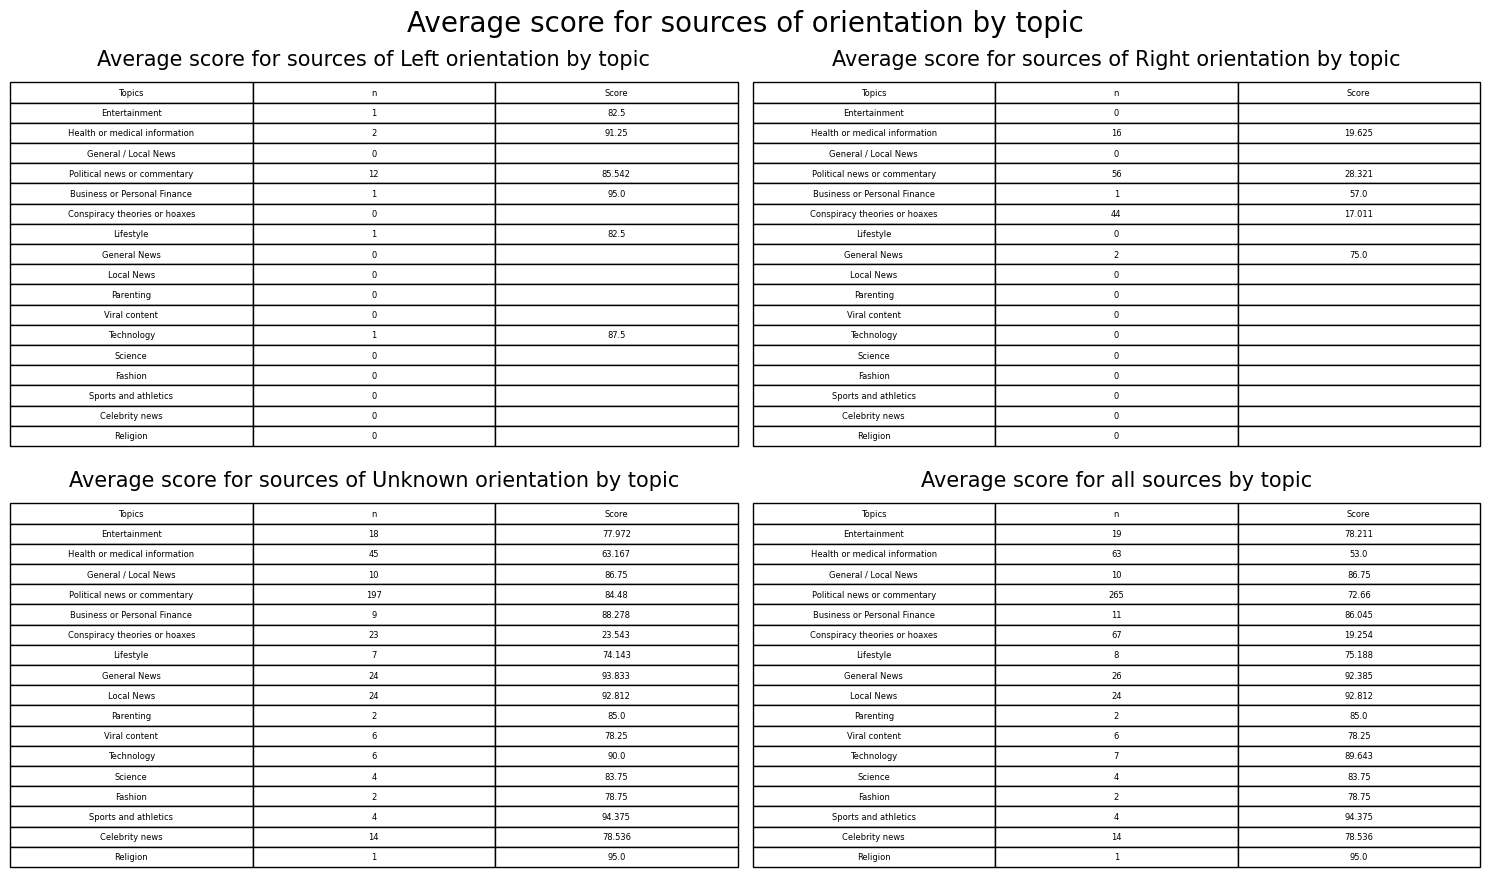

In [74]:
# table with averages of scores by orientation and topic
fig, axs = plt.subplots(2,2,figsize=(15, 9))

#substitutee nan with unknown
source_df = source_df[["Orientation","Score","Topics"]].fillna("Unknown")
for orientation in source_df.Orientation.unique():
    orientation_df = source_df[source_df["Orientation"]==orientation]
    # get ax
    ax= axs[0,0] if orientation=="Left" else axs[0,1] if orientation=="Right" else axs[1,0] if orientation=="Unknown" else axs[1,1]
    df = pd.DataFrame(columns=["Topics","n","Score"])
    for topic in topics:
        orientation_topic_df = orientation_df[orientation_df["Topics"].apply(lambda x: topic in x)]
        mean_score = orientation_topic_df["Score"].mean()
        mean_score = round(mean_score,3) if not np.isnan(mean_score) else ""
        n=len(orientation_topic_df)
        df= pd.concat([df,pd.DataFrame([[topic,n,mean_score]],columns=["Topics","n","Score"])])
    ax.table(cellText=df.values, colLabels=["Topics","n","Score"], loc='center',cellLoc='center')
    ax.title.set_text(f"Average score for sources of {orientation} orientation by topic")
    # turn off axis
    ax.axis('off')
    # reduce margins
    ax.margins(y=0.1,x=0.1)
    ax.title.set_fontsize(15)
ax= axs[1,1]
df= pd.DataFrame(columns=["Topics","n","Score"])
for topic in topics:
    topics_df = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    mean_score = topics_df["Score"].mean()
    mean_score = round(mean_score,3) if not np.isnan(mean_score) else ""
    n=len(topics_df)
    df= pd.concat([df,pd.DataFrame([[topic,n,mean_score]],columns=["Topics","n","Score"])])
    
ax.title.set_text(f"Average score for all sources by topic")
# turn off axis
ax.axis('off')
# reduce margins
ax.margins(y=0.4,x=0.1)
ax.title.set_fontsize(15)
ax.table(cellText=df.values, colLabels=["Topics","n","Score"], loc='center',cellLoc='center')
fig.suptitle("Average score for sources of orientation by topic", fontsize=20)
fig.tight_layout()
    

        

## Checking other languages

In [75]:
df_total_last=df_total[df_total["file_date"]==df_total["file_date"].max()]

df_total_last

UUID                 Domain   
0     4bcfdfb8-5587-4b00-a7c4-c4d46d31bc3a                 al.com  \
1     c6f74984-caa8-4d25-b0ab-dcd42d60d077         jacobinmag.com   
2     a24182b5-9944-43bc-917f-18db87d2f129            jacobin.com   
3     4e2555e2-2abf-4635-ba5c-8c42a706fa9d       bizpacreview.com   
4     e67b8cbe-7ca6-4d0f-b12d-ba25af9b726b   americanwirenews.com   
...                                    ...                    ...   
9921  5b442eb2-eb14-4cf0-b6ff-c81679685b0f  gesundheitstrends.com   
9922  40fb1140-536a-47a0-a06c-023fbc3ddc07          flinkfeed.com   
9923  ae8b500d-683f-4e3d-a4a2-260b725ae142          flinkfeed.com   
9924  38ffb203-ebe5-4cac-8b5a-f84dd3697faf    blog.halle-leaks.de   
9925  954dfb48-6052-4e16-baaf-3f12dfb2ccce    blog.halle-leaks.de   

     Parent Domain Rating  Score   Last Updated Country Language   
0              NaN      T   95.0  1677645622005      US       en  \
1      jacobin.com      T   92.5  1677642090547      US       en   
2      jacobin.com      T   92.5  1677642090426      US       en   
3              NaN      T   62.0  1677641633936      US       en   
4              NaN      T   74.5  1677641172988      US       en   
...            ...    ...    ...            ...     ...      ...   
9921           NaN      T   82.5  1616835161457      DE       de   
9922           NaN      N   39.5  1615380820284     ALL       en   
9923           NaN      N   39.5  1615380816262      DE       de   
9924           NaN      N   37.5  1611208307207      DE       de   
9925           NaN      N   37.5  1611208302785     ALL       en   

     Does not repeatedly publish false content   
0                                          Yes  \
1                                          Yes   
2                                          Yes   
3                                          Yes   
4                                          Yes   
...                                        ...   
9921                                       Yes   
9922                                       Yes   
9923                                       Yes   
9924                                        No   
9925                                        No   

     Gathers and presents information responsibly  ... myths   
0                                             Yes  ...   NaN  \
1                                             Yes  ...   NaN   
2                                             Yes  ...   NaN   
3                                              No  ...   NaN   
4                                              No  ...   NaN   
...                                           ...  ...   ...   
9921                                          Yes  ...   NaN   
9922                                           No  ...   NaN   
9923                                           No  ...   NaN   
9924                                           No  ...   NaN   
9925                                           No  ...   NaN   

                                               iOS App   
0     https://apps.apple.com/us/app/al-com/id419876008  \
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
...                                                ...   
9921                                               NaN   
9922                                               NaN   
9923                                               NaN   
9924                                               NaN   
9925                                               NaN   

                                            Android App Original Reporting   
0     https://play.google.com/store/apps/details?id=...                Yes  \
1                                                   NaN                Yes   
2                                                   NaN                Yes   
3            

In [76]:
df_total_last.shape

(9926, 55)

In [77]:
for language in df_total_last.Language.unique():
    # print average score by language
    unique_sources = df_total_last[df_total_last["Language"]==language]["Domain"].unique()
    print(f"Language: {language}, Average: {df_total_last[df_total_last['Language']==language]['Score'].mean()}, Number of sources: {unique_sources.shape[0]}")

Language: en, Average: 63.592234141791046, Number of sources: 8663
Language: it, Average: 71.71670190274841, Number of sources: 481
Language: fr, Average: 66.00477326968974, Number of sources: 431
Language: de, Average: 75.1125730994152, Number of sources: 347
Language: es, Average: 82.5, Number of sources: 1


## DE, IT and EN dataset

In [78]:
# get it language, de language and en language sources
dataset=df_total[df_total_last["Language"].isin(["it","de","en"])]
dataset=dataset[dataset.Country.isin(["US","IT","DE","GB","AT"])]



C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\1609805973.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset=df_total[df_total_last["Language"].isin(["it","de","en"])]


In [79]:
# score over years
dataset["file_date"]=pd.to_datetime(dataset["file_date"])

In [80]:
dataset.groupby(["file_date"]).Score.mean()
dataset.groupby(["file_date"]).Score.median()


file_date
2019-03-01    87.5
2019-09-01    87.5
2020-03-01    82.5
2020-09-01    77.5
2021-03-01    80.0
2021-09-01    77.5
2022-03-01    80.0
2022-09-01    80.0
2023-03-01    72.5
Name: Score, dtype: float64

In [81]:
df_total_last[~df_total_last["Language"].isin(["it","de","en"])].Language.value_counts()

Language
fr    431
es      1
Name: count, dtype: int64

In [82]:
dataset.Language.value_counts()

Language
en    43130
it     2616
de     2027
es        2
Name: count, dtype: int64

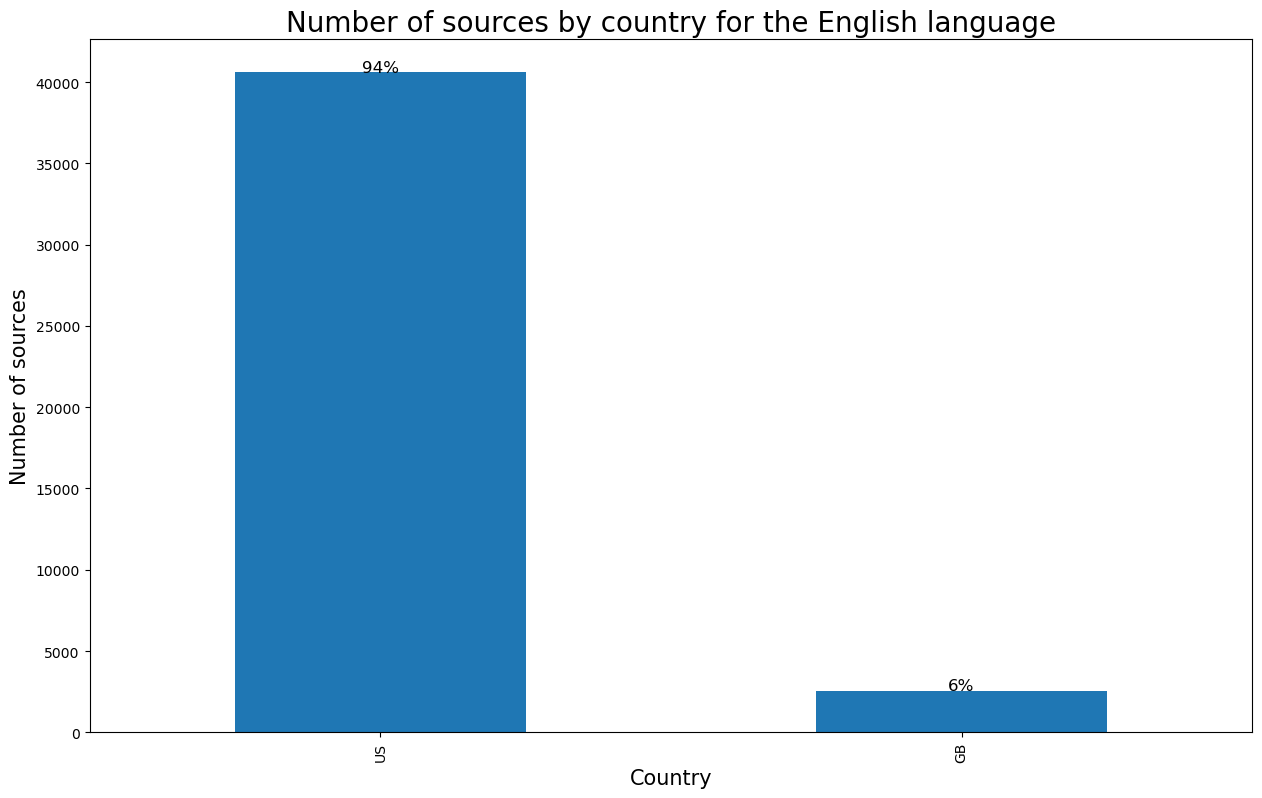

In [83]:
# plot en language sources by country

# bar plot with number of sources by country

plt.figure(figsize=(15, 9))
dataset[dataset["Language"]=="en"].Country.value_counts().plot(kind="bar")
# plot over every bar the percentage of sources

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x()+p.get_width()/2,height+50, '{:.0f}%'.format(height/dataset[dataset["Language"]=="en"].shape[0]*100), ha="center",fontsize=12)
    


plt.title("Number of sources by country for the English language",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of sources",fontsize=15)
plt.show()

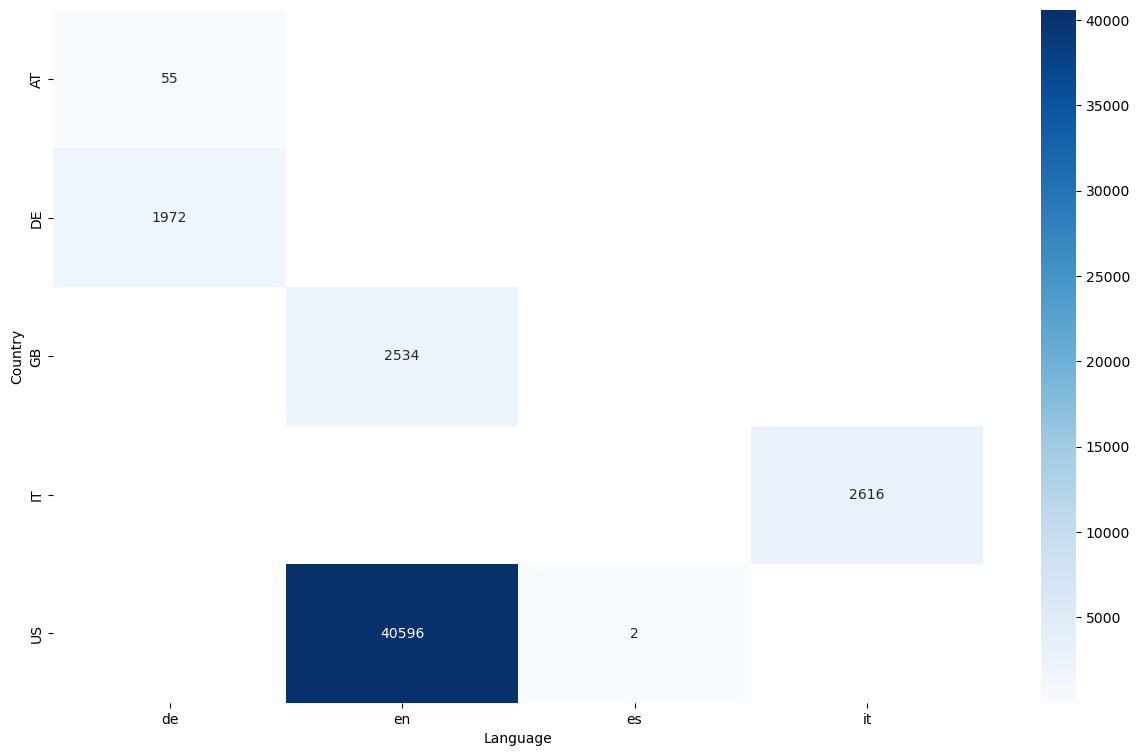

In [84]:
# heatmap with number of sources by country and language

plt.figure(figsize=(15, 9))
sns.heatmap(dataset.groupby(["Country","Language"]).size().unstack(),annot=True,fmt=".0f",cmap="Blues")
plt.show()


In [85]:
# percentage of sources with score over 60 over time rounded to 2 decimals over time
dataset.groupby(["file_date"]).Score.apply(lambda x: x.apply(lambda x: 1 if x>=60 else 0).mean()).round(3)

file_date
2019-03-01    0.714
2019-09-01    0.722
2020-03-01    0.658
2020-09-01    0.553
2021-03-01    0.576
2021-09-01    0.579
2022-03-01    0.607
2022-09-01    0.584
2023-03-01    0.577
Name: Score, dtype: float64

In [86]:

# latest ita sources
ita=dataset[dataset["Language"]=="it"]
ita=ita[ita["file_date"]==ita["file_date"].max()]

In [87]:
ita.columns

Index(['UUID', 'Domain', 'Parent Domain', 'Rating', 'Score', 'Last Updated',
       'Country', 'Language', 'Does not repeatedly publish false content',
       'Gathers and presents information responsibly',
       'Regularly corrects or clarifies errors',
       'Handles the difference between news and opinion responsibly',
       'Avoids deceptive headlines',
       'Website discloses ownership and financing',
       'Clearly labels advertising',
       'Reveals who's in charge, including any possible conflicts of interest',
       'The site provides names of content creators, along with either contact or biographical information',
       'Brand Name', 'Wikipedia', 'Type of Content', 'Medium',
       'Print Publications', 'Scope of Coverage', 'Designated Market Area',
       'Paywall', 'Opinion/Advocacy Journalism', 'Orientation', 'Owner',
       'Type of Owner', 'Facebook', 'Twitter', 'YouTube', 'Instagram',
       'Snapchat', 'LinkedIn', 'Pinterest', 'Main Point of Contact (name)',


In [88]:
# keep only Score, Orientation, Domain and criterias (the long name ones) column
ita=ita[["Score","Orientation","Domain",'Does not repeatedly publish false content',
       'Gathers and presents information responsibly',
       'Regularly corrects or clarifies errors',
       'Handles the difference between news and opinion responsibly',
       'Avoids deceptive headlines',
       'Website discloses ownership and financing',
       'Clearly labels advertising',
       "Reveals who's in charge, including any possible conflicts of interest",
       'The site provides names of content creators, along with either contact or biographical information', "Last Updated"]].sort_values(by="Score",ascending=False)


In [89]:
ita.Score.mean()

71.71670190274841

In [90]:
ita.index=ita.Domain
ita.drop(columns=["Domain"],inplace=True)

<AxesSubplot:ylabel='Frequency'>

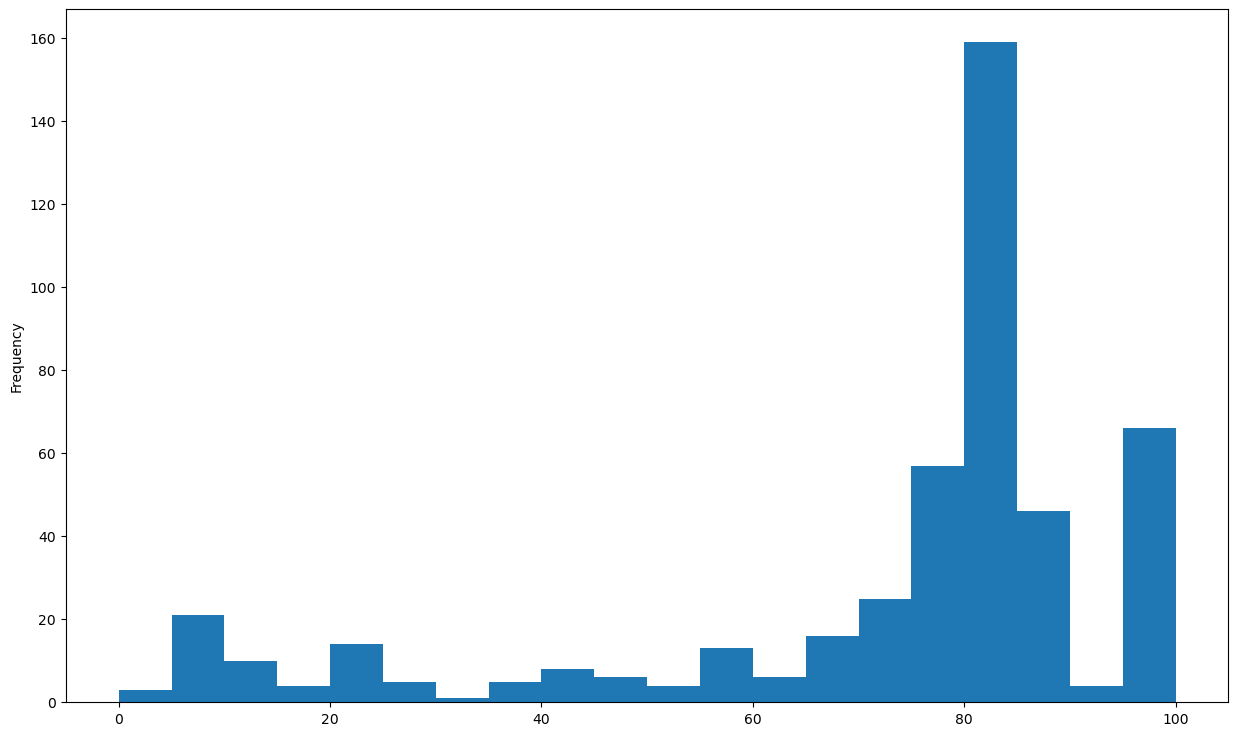

In [91]:
ita.Score.plot(kind="hist",figsize=(15, 9),bins=20)

In [92]:
ita=ita.dropna(subset=["Score"])
# last updated to datetime, unix timestamp
ita["Last Updated"]=pd.to_datetime(ita["Last Updated"],unit="ms")

In [93]:
# sort by last updated
ita=ita.sort_values(by="Last Updated",ascending=False)
ita

Score Orientation   
Domain                                   
visionetv.it          12.5         NaN  \
quicosenza.it         75.0         NaN   
askanews.it           82.5         NaN   
grottaglieinrete.it   82.5         NaN   
gay.it                75.0        Left   
...                    ...         ...   
veronasera.it         82.5         NaN   
parmatoday.it         82.5         NaN   
ilpiacenza.it         82.5         NaN   
livornotoday.it       82.5         NaN   
cisiamo.info          44.5         NaN   

                    Does not repeatedly publish false content   
Domain                                                          
visionetv.it                                               No  \
quicosenza.it                                             Yes   
askanews.it                                               Yes   
grottaglieinrete.it                                       Yes   
gay.it                                                    Yes   
...                                                       ...   
veronasera.it                                             Yes   
parmatoday.it                                             Yes   
ilpiacenza.it                                             Yes   
livornotoday.it                                           Yes   
cisiamo.info                                              Yes   

                    Gathers and presents information responsibly   
Domain                                                             
visionetv.it                                                  No  \
quicosenza.it                                                Yes   
askanews.it                                                  Yes   
grottaglieinrete.it                                          Yes   
gay.it                                                       Yes   
...                                                          ...   
veronasera.it                                                Yes   
parmatoday.it                                                Yes   
ilpiacenza.it                                                Yes   
livornotoday.it                                              Yes   
cisiamo.info                                                  No   

                    Regularly corrects or clarifies errors   
Domain                                                       
visionetv.it                                            No  \
quicosenza.it                                           No   
askanews.it                                             No   
grottaglieinrete.it                                     No   
gay.it                                                  No   
...                                                    ...   
veronasera.it                                           No   
parmatoday.it                                           No   
ilpiacenza.it                                           No   
livornotoday.it                                         No   
cisiamo.info                                            No   

                    Handles the difference between news and opinion responsibly   
Domain                                                                            
visionetv.it                                                        No           \
quicosenza.it                                                      Yes            
askanews.it                                                        Yes            
grottaglieinrete.it                                                Yes            
gay.it                                                              No            
...                                                                ...            
veronasera.it                                                      Yes            
parmatoday.it                                                      Yes            
ilpiacenza.it                                                      Yes            
livornotoday.it        

In [94]:
# find newspapers with scomodo in their domain
ita[ita.index.str.contains("leggi")]

Score Orientation Does not repeatedly publish false content   
Domain                                                                     
leggilo.org   70.0       Right                                       Yes  \

            Gathers and presents information responsibly   
Domain                                                     
leggilo.org                                          Yes  \

            Regularly corrects or clarifies errors   
Domain                                               
leggilo.org                                     No  \

            Handles the difference between news and opinion responsibly   
Domain                                                                    
leggilo.org                                                 No           \

            Avoids deceptive headlines   
Domain                                   
leggilo.org                        Yes  \

            Website discloses ownership and financing   
Domain                                                  
leggilo.org                                       Yes  \

            Clearly labels advertising   
Domain                                   
leggilo.org                        Yes  \

            Reveals who's in charge, including any possible conflicts of interest   
Domain                                                                              
leggilo.org                                                Yes                     \

            The site provides names of content creators, along with either contact or biographical information   
Domain                                                                                                           
leggilo.org                                                 No                                                  \

                       Last Updated  
Domain                               
leggilo.org 2022-07-03 14:36:31.312

## How often do German sources get updated?


In [153]:
df_total_de=df_total[df_total["Language"]=="de"]

# let's see how often german sources get updated
for time in df_total_de.file_date.unique():
    # skip first date
    if time==df_total_de.file_date.unique()[0]:
        continue
    time_index=df_total_de[df_total_de["file_date"]==time].index
    
    # dataset with current time
    current_dataset=df_total_de[df_total_de["file_date"]==time]
    # dataset with previous time using time_index-1
    prev_dataset=df_total_de[df_total_de["file_date"]==df_total_de.file_date.unique()[list(df_total_de.file_date.unique()).index(time)-1]]
    diff_dataset=pd.merge(current_dataset,prev_dataset,on="Domain",how="outer",suffixes=("_current","_previous"))
        

    

    # drop nan rows
    diff_dataset=diff_dataset.dropna(subset=["Score_current","Score_previous"])
    time=time.strftime("%Y-%m")

    # print n of changes and perc
    print(f"Date: {time}, Number of German sources: {current_dataset.shape[0]},Number of changes: {updated_sources.shape[0]}, Percentage of changes: {round(updated_sources.shape[0]/current_dataset.shape[0]*100,2)}%")
    # updated sources (sources in which the score changed)
    updated_sources=diff_dataset[diff_dataset["Score_current"]!=diff_dataset["Score_previous"]].copy()
    # calculate score diff
    updated_sources["Score_diff"]=updated_sources["Score_current"]-updated_sources["Score_previous"]
    # print the top score diff and source
    print(f"Date: {time}, Top score diff: {updated_sources['Score_diff'].max()}, Source: {updated_sources[updated_sources['Score_diff']==updated_sources['Score_diff'].max()]['Domain'].values[0]}, previous score: {updated_sources[updated_sources['Score_diff']==updated_sources['Score_diff'].max()]['Score_previous'].values[0]}, current score: {updated_sources[updated_sources['Score_diff']==updated_sources['Score_diff'].max()]['Score_current'].values[0]}")

Date: 2020-03, Number of German sources: 213,Number of changes: 42, Percentage of changes: 19.72%
Date: 2020-03, Top score diff: 12.5, Source: bz-berlin.de, previous score: 82.5, current score: 95.0
Date: 2020-09, Number of German sources: 248,Number of changes: 10, Percentage of changes: 4.03%
Date: 2020-09, Top score diff: 12.5, Source: ruhrnachrichten.de, previous score: 87.5, current score: 100.0
Date: 2021-03, Number of German sources: 270,Number of changes: 3, Percentage of changes: 1.11%
Date: 2021-03, Top score diff: 25.0, Source: rollingstone.de, previous score: 70.0, current score: 95.0
Date: 2021-09, Number of German sources: 273,Number of changes: 54, Percentage of changes: 19.78%
Date: 2021-09, Top score diff: 39.5, Source: medizin-heute.net, previous score: 12.5, current score: 52.0
Date: 2022-03, Number of German sources: 279,Number of changes: 27, Percentage of changes: 9.68%
Date: 2022-03, Top score diff: 12.5, Source: derwesten.de, previous score: 72.5, current score:

C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\1925032018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_de["file_date"]=pd.to_datetime(df_total_de["file_date"])
C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\1925032018.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_de["file_date"] = pd.to_datetime(df_total_de["file_date"])


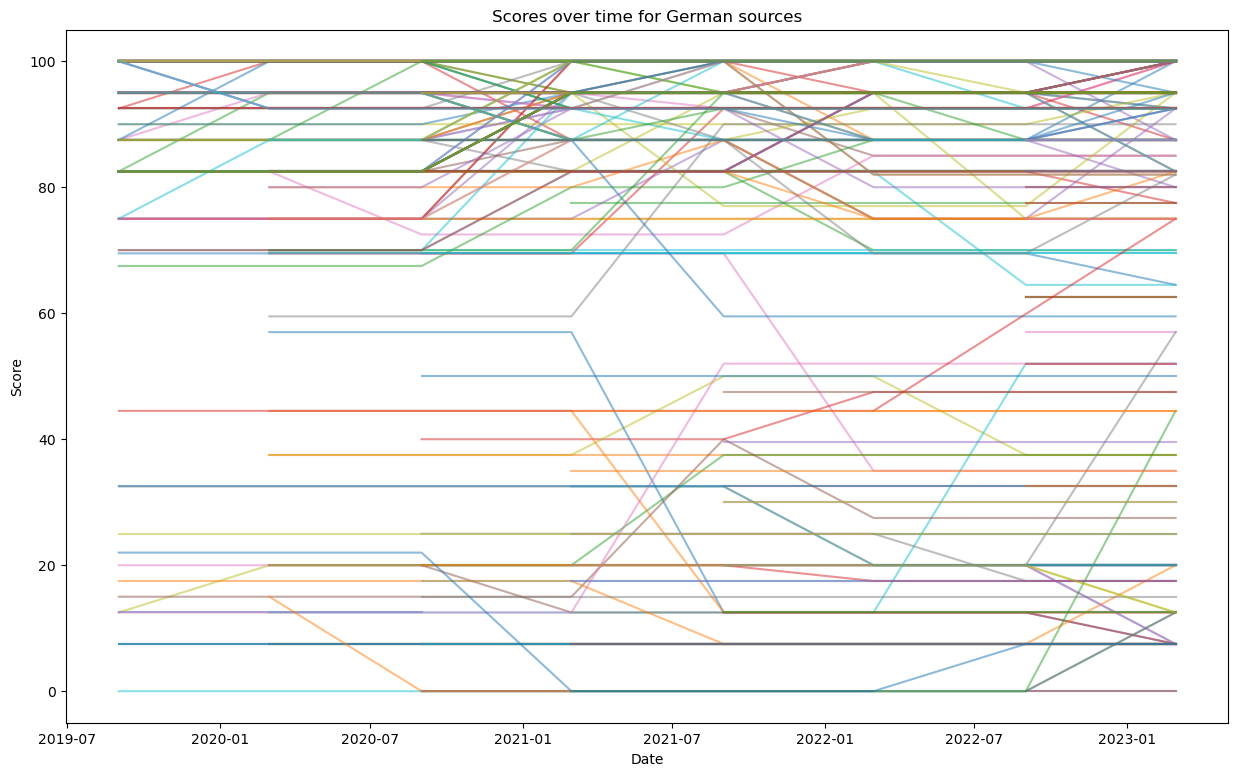

In [159]:
# get all scores over the years for every german source
# x axis is time, y axis is score
# make a line plot with all the scores over time for every german source

df_total_de["file_date"]=pd.to_datetime(df_total_de["file_date"])

import matplotlib.pyplot as plt

# convert file_date to datetime
df_total_de["file_date"] = pd.to_datetime(df_total_de["file_date"])

# create a line plot for each domain
fig, ax = plt.subplots(figsize=(15, 9))
for domain, data in df_total_de.groupby("Domain"):
    ax.plot(data["file_date"], data["Score"], label=domain, alpha=0.5)

# set plot title and axis labels
ax.set_title("Scores over time for German sources")
ax.set_xlabel("Date")
ax.set_ylabel("Score")



plt.show()


UUID_x              Domain Parent Domain_x   
0    986c8632-636e-4dbf-9e5d-13ff7060dfeb         zackzack.at             NaN  \
1    3c93a771-dbb9-4552-9f46-f74c7e7caa06           vienna.at             NaN   
2    7de5bcf9-d524-4ad3-a2d2-f8218cd001b4        servustv.com             NaN   
3    143d9a02-fe66-4d04-878b-1a68127fc798           puls24.at             NaN   
4    9a05ddc4-0860-4a34-aa14-da2c35e871f3  dietagespresse.com             NaN   
..                                    ...                 ...             ...   
342                                   NaN       tip-berlin.de             NaN   
343                                   NaN               sn.at             NaN   
344                                   NaN         gentside.de             NaN   
345                                   NaN     radiobrocken.de             NaN   
346                                   NaN           heftig.de             NaN   

    Rating_x  Score_x  Last Updated_x Country Language_x   
0          T     87.5    1.661406e+12      AT         de  \
1          T     82.5    1.661406e+12      AT         de   
2          N     52.0    1.661406e+12      AT         de   
3          T     95.0    1.661406e+12      AT         de   
4          S      NaN    1.661406e+12      AT         de   
..       ...      ...             ...     ...        ...   
342      NaN      NaN             NaN      DE        NaN   
343      NaN      NaN             NaN      AT        NaN   
344      NaN      NaN             NaN      DE        NaN   
345      NaN      NaN             NaN      DE        NaN   
346      NaN      NaN             NaN      DE        NaN   

    Does not repeatedly publish false content_x   
0                                           Yes  \
1                                           Yes   
2                                           Yes   
3                                           Yes   
4                                           NaN   
..                                          ...   
342                                         NaN   
343                                         NaN   
344                                         NaN   
345                                         NaN   
346                                         NaN   

    Gathers and presents information responsibly_x  ...   
0                                              Yes  ...  \
1                                              Yes  ...   
2                                               No  ...   
3                                              Yes  ...   
4                                              NaN  ...   
..                                             ...  ...   
342                                            NaN  ...   
343                                            NaN  ...   
344                                            NaN  ...   
345                                            NaN  ...   
346                                            NaN  ...   

                                             iOS App_y   
0    https://apps.apple.com/de/app/zackzack-das-onl...  \
1    https://apps.apple.com/us/app/vienna-at-vienna...   
2                                                  NaN   
3            https://apps.apple.com/at/app/id385942785   
4    https://apps.apple.com/de/app/tagespresse/id10...   
..                                                 ...   
342                                                NaN   
343  https://apps.apple.com/at/app/salzburger-nachr...   
344                                                NaN   
345  https://apps.apple.com/de/app/radio-brocken/id...   
346                                                NaN   

                                         Android App_y Original Reporting_y   
0    https://play.google.com/store/apps/details?id=...                  Yes  \
1    https://play.google.com/store/apps/details?id=...                  Yes   
2                                                  NaN                  Yes   
3    h